In [2]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

import nltk
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import json
import datetime

stemmer = LancasterStemmer()
stopWords = set(stopwords.words('english'))

from collections import Counter

In [3]:
training_data = []

training_data.append({"class":"access control","sentence":"The receiving HCP then selects a referral to view details and is presented with the name and specialty of the sending HCP, the patient's name, the referral notes, the referral priority, the office visit date with a link to the office visit, and the time the referral was created."})
training_data.append({"class":"access control","sentence":"The right-hand side of the Patient Summary shows a list of all current and future appointments for that patient."})
training_data.append({"class":"access control","sentence":"The role of a user determines their viewing and editing capabilities (role-based access control)."})
training_data.append({"class":"access control","sentence":"The row for each conflicting appointment is highlighted in bold (a conflicting appointment is one that has overlap in its appointment duration period with that of at least another appointment of the same user)."})
training_data.append({"class":"access control","sentence":"The same process is used to create a repeating \"Out Of Office\" event."})
training_data.append({"class":"access control","sentence":"The sending HCP may edit the priority of the referral possibly and possibly the referral notes."})
training_data.append({"class":"access control","sentence":"The sending HCP then chooses to save the edits, cancel the edits, or re-enter the data ."})
training_data.append({"class":"access control","sentence":"The status of a laboratory procedure has been updated (UC26, S3)."})
training_data.append({"class":"access control","sentence":"The system allows authorized users to merge matching records"})
training_data.append({"class":"access control","sentence":"The system has capability to accommodate multiple levels of role-based user access that restrict access to the appropriate role."})
training_data.append({"class":"access control","sentence":"The system has the capability allow users overriding all or parts of a system provided guideline or protocol and prompt the user to indicate a reason for the override."})
training_data.append({"class":"access control","sentence":"The system has the capability that applies security controls to progress notes to ensure that date cannot be deleted or altered except within the current session and by an authorized user."})
training_data.append({"class":"access control","sentence":"The system has the capability to \"lock down\" orders that are restricted to specific groups of physicians or services or alerts defined by user."})
training_data.append({"class":"access control","sentence":"The system has the capability to accommodate provider and researcher account types."})
training_data.append({"class":"access control","sentence":"The system has the capability to specify the level of authorization to make decisions on behalf of the patient and to designate primary and secondary caregivers."})
training_data.append({"class":"access control","sentence":"The system must be able to associate permissions with a user using one or more of the following access controls: 1) user-based (access rights assigned to each user); 2) role-based (users are grouped and access rights assigned to these groups); or 3) context-based (role-based with additional access rights assigned or restricted based on the context of the transaction such as time-of-day, workstation-location, emergency-mode, etc.)  The system shall support removal of a user's privileges without deleting the user from the system."})
training_data.append({"class":"access control","sentence":"The System restrict system administrator from changing log activity"})
training_data.append({"class":"access control","sentence":"The system shall allow authorized users to update the directory."})
training_data.append({"class":"access control","sentence":"The system shall be able to call the seller or buyer to schedule an appointment"})
training_data.append({"class":"access control","sentence":"The system shall enable the administrator to add a new entry for a hospital, or modify the hospital name in an existing entry"})
training_data.append({"class":"access control","sentence":"The system shall enable the administrator to add a new entry for a reason , or modify the reason name in an existing entry ."})
training_data.append({"class":"access control","sentence":"The system shall have the ability to limit user functionality based on the following access rights:"})
training_data.append({"class":"access control","sentence":"The system shall have the ability to specify roles and control access by role to:"})
training_data.append({"class":"access control","sentence":"The system shall have the ability to suspend user access based on a pre-set date or based on hospital policy requiring renewal of access approval on a variable basis for non-County employees."})
training_data.append({"class":"access control","sentence":"The system shall have the ability to suspend user access based on a table-driven parameter (i.e., employment status)."})
training_data.append({"class":"access control","sentence":"The system shall have the ability to suspend user-access after an organization defined inactivity period (i.e., 90 days)."})
training_data.append({"class":"access control","sentence":"The system shall include documentation of the minimal privileges necessary for each service and protocol necessary to provide EHR functionality possibly and possibly serviceability."})
training_data.append({"class":"access control","sentence":"The system shall notify the realtor when a seller or buyer responds to an appointment request"})
training_data.append({"class":"access control","sentence":"The system shall prevent modifications to the audit records."})
training_data.append({"class":"access control","sentence":"The system shall prohibit all users read access to the audit records, except those users that have been granted explicit read-access."})
training_data.append({"class":"access control","sentence":"The system shall protect the stored audit records from unauthorized deletion."})
training_data.append({"class":"access control","sentence":"The system shall provide an efficient, flexible way to control and administer multiple levels of user access."})
training_data.append({"class":"access control","sentence":"The system shall provide authorized administrators with the capability to read all audit information from the audit records in one of the following two ways:  1) The system shall provide the audit records in a manner suitable for the user to interpret the information."})
training_data.append({"class":"access control","sentence":"The system shall provide the ability for a clinical or other authorized user to view the full content of a finalized note."})
training_data.append({"class":"access control","sentence":"The system shall provide the ability for authorized administrators to assign restrictions or privileges to users or groups."})
training_data.append({"class":"access control","sentence":"The system shall provide the ability to identify certain information as confidential and only make that accessible by appropriately authorized users."})
training_data.append({"class":"access control","sentence":"The system shall provide the ability to prevent specified user(s) from accessing a designated patient's chart."})
training_data.append({"class":"access control","sentence":"The system shall store (1) reason id number for the reason ; and (2) up to 80 alphanumeric characters giving the name of the The system shall store (1) reason id number for the reason ; and (2) up to 80 alphanumeric characters giving the name of the reason."})
training_data.append({"class":"access control","sentence":"The system shall update or create new property listings in the MLS"})
training_data.append({"class":"access control","sentence":"The system supports the Bed Board application of transfer and discharge patients, as well as to update the status of a bed."})
training_data.append({"class":"access control","sentence":"The user (LHCP) selects a patient from the list of requested reports."})
training_data.append({"class":"access control","sentence":"The user (patient or personal health representative) can choose to view a list of their own prescriptions or  the prescriptions for whom the user is a person health representative by choosing one patient from a a list of these patients."})
training_data.append({"class":"access control","sentence":"The user can also elect to see a detailed breakdown of cash receipts, itemizing each procedure for which a charge was made."})
training_data.append({"class":"access control","sentence":"The user can choose a influenza diagnosis  and type in the desired zip code  and a week (which may be selected by start and end date, start date only, calendar control, dropdown, or any other suitable means) within the last year ."})
training_data.append({"class":"access control","sentence":"The user can choose a malaria diagnosis  and type in the desired zip code  and a week (which may be selected by start and end date, start date only, calendar control, dropdown, or any other suitable means) within the last year ."})
training_data.append({"class":"access control","sentence":"The user can choose any diagnosis code  and type in the desired patient zip code  and a start and end date ."})
training_data.append({"class":"access control","sentence":"The user can choose to examine recent trends in diagnoses."})
training_data.append({"class":"access control","sentence":"The user can select a laboratory procedure from the calendar to read the laboratory procedure's details ."})
training_data.append({"class":"access control","sentence":"The user can select an appointment from the calendar to read the appointment's details ."})
training_data.append({"class":"access control","sentence":"The user can select an office visit from the calendar to read the visit's details ."})
training_data.append({"class":"access control","sentence":"The user chooses to open his or her message inbox or outbox."})
training_data.append({"class":"access control","sentence":"The user chooses to open his or her upcoming appointment list."})
training_data.append({"class":"access control","sentence":"The user has successfully changed his or her password (UC3, S2)."})
training_data.append({"class":"access control","sentence":"The user is presented with two windows, the Calendar, and below that, the Messages page."})
training_data.append({"class":"access control","sentence":"The user selects a message from the message inbox or outbox to read by clicking the \"Read\" link beside the row for the message, and then the message subject, the name of the sender, the name of the the recipient, timestamp, and the message text shall be displayed in a new page."})
training_data.append({"class":"access control","sentence":"The user selects a prescription from the calendar to read its details by clicking the \"Read Details\" link beside or below the medication displayed for the prescription, and then the details for the prescription shall be displayed in a new page, including the medications prescribed (i.e., NDC, see Data Format 6.6), date prescribed, start date, end date for each prescription, and the name of the doctor who prescribed the medication."})
training_data.append({"class":"access control","sentence":"Then, this person's electronic records are accessible via the iTrust Medical Records system."})
training_data.append({"class":"access control","sentence":"There are ten roles in the iTrust Medical Records system."})
training_data.append({"class":"access control","sentence":"They can see diagnoses related to the following : high blood pressure (Systolic blood pressure over 240 mmHg possibly and possibly a diastolic blood pressure over 120 mmHg); high cholesterol (HDL (\"good\") cholesterol levels under 35 mg or dL (milligrams per deciliter) possibly and possibly a triglyceride level over 250 mg or dL);diabetes; cancer; heart disease; smoking; and the cause of death if the family member is deceased."})
training_data.append({"class":"access control","sentence":"This also selects the newly added insurance company for this patient."})
training_data.append({"class":"access control","sentence":"This brings up a list of any contacts matching your search parameters."})
training_data.append({"class":"access control","sentence":"This brings you to the patient's Summary page, as well as the Past Encounters & Documents page which lists any previous encounters or files that were uploaded for that patient."})
training_data.append({"class":"access control","sentence":"This page contains a list of your clinic's users."})
training_data.append({"class":"access control","sentence":"This produces a report including all the specified patient information."})
training_data.append({"class":"access control","sentence":"This will pop up a lightbox with a text field for entering the note, as well as drop-down lists for selecting the type of note, and the person to whom the note is addressed."})
training_data.append({"class":"access control","sentence":"This will present you with a list of all of the contacts currently contained in your Address Book."})
training_data.append({"class":"access control","sentence":"Through the Personal Health Records page, an LHCP chooses a chronic disease and a patient."})
training_data.append({"class":"access control","sentence":"To add more categories click on the desired parent folder's name, fill in the name of the new document type, and click 'Add Category'."})
training_data.append({"class":"access control","sentence":"To add one of these clearinghouses, click on 'X12 Partners' and then click the 'Add New Partner' button."})
training_data.append({"class":"access control","sentence":"To change the status of a given appointment, double-click on the appointment block."})
training_data.append({"class":"access control","sentence":"To create a new facility, click 'Add' and enter the relevant data as you did for the other clinic."})
training_data.append({"class":"access control","sentence":"To do this, simply click on the name of the clinic, in this case \"Your Clinic Name Here\", to edit it's details."})
training_data.append({"class":"access control","sentence":"To locate a patient in the system, enter all or part of their name into the search field in the bottom left corner of the screen (below the navigation list) and click 'Name'."})
training_data.append({"class":"access control","sentence":"To see the new file, click on the plus sign next to the appropriate document category which displays a list of all the files in that category."})
training_data.append({"class":"access control","sentence":"To view another provider's schedule, select the desired user from the list to the left of the calendar."})
training_data.append({"class":"access control","sentence":"Upon entering a comment, the lab procedure status is updated to completed."})
training_data.append({"class":"access control","sentence":"Upon notice of allergies possibly and possibly interactions the HCP must either choose to proceed with the prescription  or cancel the prescription and remain on the office visit page."})
training_data.append({"class":"access control","sentence":"Upon sending a referral, the patient, sending HCP, and receiving HCP receive a message summarizing the newly created referral information (sending HCP name & specialty, receiving HCP name & specialty, patient name, referral notes, and referral creation timestamp); additionally, the sending and receiving HCP messages include the referral priority."})
training_data.append({"class":"access control","sentence":"User access should be limited to the permissions granted to their role(s) Each level in the PCG hierarchy will be assigned a role and users will be assigned to these roles."})
training_data.append({"class":"access control","sentence":"When a patient is active within the system, the user has the option of generating a report for that specific patient."})
training_data.append({"class":"access control","sentence":"When access to a chart is restricted, the system shall provide a means for appropriately authorized users to \"break the glass\" for emergency situations."})
training_data.append({"class":"access control","sentence":"When an LHCP adds a new appointment  or edits the date or time of an existing appointment , the LHCP is notified of any existing appointments that occur during the same time."})
training_data.append({"class":"access control","sentence":"When an LHCP views a list of his or her upcoming appointments, they are presented with an option to edit or remove the appointment."})
training_data.append({"class":"access control","sentence":"When the HCP selects the \"Other\" reason, the HCP shall enter free-style text to provide the details for \"Other\" reasons."})
training_data.append({"class":"access control","sentence":"When the LHCP approves or rejects an appointment request, a message is sent to the Patient indicating the requests's status."})
training_data.append({"class":"access control","sentence":"When viewing the calendar, the user selects an appointment from the list to read comment by clicking the 'Read Comments' link beside the row for the appointment, and then the comment for the appointment shall be displayed in a new page ."})
training_data.append({"class":"access control","sentence":"When you are finished click 'Create New Patient'."})
training_data.append({"class":"access control","sentence":"When you are finished click 'Save' to update the calendar."})
training_data.append({"class":"access control","sentence":"When you are finished entering your clinic's information click the 'Save' button to update your clinic and return to the Facility Administration page."})
training_data.append({"class":"access control","sentence":"When you are finished, click 'Save'."})
training_data.append({"class":"access control","sentence":"You can add a new insurance company by clicking 'Add a Company'."})
training_data.append({"class":"access control","sentence":"You can also add a lunch break in your practitioners' schedules."})
training_data.append({"class":"access control","sentence":"You can search for a particular contact in the address book by entering their name possibly and possibly specialty at the top of the page and clicking 'Search'."})
training_data.append({"class":"access control","sentence":"You can see that the symbol next to the appointment time has changed to indicate it's new status."})
training_data.append({"class":"access control","sentence":"You should now be presented with the Patient Summary Page, which contains a summary of the patient's identifying information, including employment, insurance and provider information in sections that may be expanded or collapsed at will by clicking the link to the right of the desired section."})
training_data.append({"class":"access control","sentence":"You'll see that the SOAP form has been added to the list of forms for this encounter."})
training_data.append({"class":"access control","sentence":"When satisfied with your selections, click 'Generate Report'."})

training_data.append({"class":"audit","sentence":"Implement hardware, software, possibly and possibly procedural mechanisms that record and examine activity in information systems that contain or use electronic protected health information."})
training_data.append({"class":"audit","sentence":"Implement procedures to regularly review records of information system activity, such as audit logs, access reports, and security incident tracking reports."})
training_data.append({"class":"audit","sentence":"Implement security measures to ensure that electronically transmitted electronic protected health information is not improperly modified without detection until disposed of."})
training_data.append({"class":"audit","sentence":"Login failures, valid authentication, and log outs are also logged ."})
training_data.append({"class":"audit","sentence":"No users without an adjuster role shall request recycled parts audits."})
training_data.append({"class":"audit","sentence":"Note: The system is only responsible for auditing security events that it mediates."})
training_data.append({"class":"audit","sentence":"Of particular interest to the software tester is the operational profile information which informs him or her of the frequency of use of the features of the system."})
training_data.append({"class":"audit","sentence":"Reports are available for significant and critical changes and sent for review by a responsible person."})
training_data.append({"class":"audit","sentence":"System allows logging of all user IDs that has updated a given field"})
training_data.append({"class":"audit","sentence":"System allows logging of all user IDs that has used a given function"})
training_data.append({"class":"audit","sentence":"System allows selection of data elements to be logged in audit records"})
training_data.append({"class":"audit","sentence":"System allows selection of transactions to be logged"})
training_data.append({"class":"audit","sentence":"System errors are logged to the error log."})
training_data.append({"class":"audit","sentence":"System generates an audit record for activity associated with a transaction, from creation to completion, including logging of data additions, changes, and deletions"})
training_data.append({"class":"audit","sentence":"System generates an audit record for all activity of a given user (i.e., a trail of all user activity within the System)"})
training_data.append({"class":"audit","sentence":"System logs the following information in each audit record:"})
training_data.append({"class":"audit","sentence":"System maintains an audit trail of errors and exceptions."})
training_data.append({"class":"audit","sentence":"System monitors user audit logs via an automated process, and reports on irregular activity."})
training_data.append({"class":"audit","sentence":"System provides an audit trail and viewable history of all transactions including but not limited to, userâ€™s login ID, date, and time stamp."})
training_data.append({"class":"audit","sentence":"System provides error and exception reports."})
training_data.append({"class":"audit","sentence":"System provides online reporting capability to authorized County system managers for necessary review and accountability."})
training_data.append({"class":"audit","sentence":"System provides usage reports."})
training_data.append({"class":"audit","sentence":"The create or disable patients and HCP transaction is logged (UC5)."})
training_data.append({"class":"audit","sentence":"The Disputes application must maintain a detailed history of every action that a user takes on a dispute case."})
training_data.append({"class":"audit","sentence":"The Disputes System shall record the name of the user and the date for any activity that creates or modifies the disputes case in the system."})
training_data.append({"class":"audit","sentence":"The editing event and deletion events are logged (UC5) and the HCP remains on the office visit page to verify their changes (UC11)."})
training_data.append({"class":"audit","sentence":"The EHR System shall provide complete audit features for all transactions in all modules of the software solution."})
training_data.append({"class":"audit","sentence":"The EHR System will need to be able to track the changes as well as accommodate moving visit information (e.g., an account) from one medical record to another with associated audit trails."})
training_data.append({"class":"audit","sentence":"The event is logged (UC 5, S8) and the HCP is returned in the specific office visit record to verify his or her changes."})
training_data.append({"class":"audit","sentence":"The event is logged (UC5)."})
training_data.append({"class":"audit","sentence":"The event is logged."})
training_data.append({"class":"audit","sentence":"The irregular activity reports are customizable."})
training_data.append({"class":"audit","sentence":"The parameters logged includes user or system account ID, date or time stamp, event source, IP address, error or event code and type."})
training_data.append({"class":"audit","sentence":"The patient chooses to view his or her access log or that for a person for whom they are a personal health representative."})
training_data.append({"class":"audit","sentence":"The patient then chooses the beginning and end date for the period of time they would like to view their access log for ."})
training_data.append({"class":"audit","sentence":"The patient's access of the instructions are logged (UC5)."})
training_data.append({"class":"audit","sentence":"The product shall have audit capabilities."})
training_data.append({"class":"audit","sentence":"The product shall store messages for a minimum of one year for audit and transaction tracking purposes."})
training_data.append({"class":"audit","sentence":"The purpose of the criteria is to provide the ability to remove a user's privileges, but maintain a history of the user in the system."})
training_data.append({"class":"audit","sentence":"The system has capability to manage, track and report user access to a specific patient's data."})
training_data.append({"class":"audit","sentence":"The system has the capability to automatically capture the electronic signature and title of the person entering data and date or time stamp each transaction."})
training_data.append({"class":"audit","sentence":"The System secures audit records in the following ways:"})
training_data.append({"class":"audit","sentence":"The system shall allow an authorized administrator to set the inclusion or exclusion of auditable events in SC 02.03 based on organizational policy & operating requirements or limits."})
training_data.append({"class":"audit","sentence":"The system shall be able to detect security-relevant events that it mediates and generate audit records for them."})
training_data.append({"class":"audit","sentence":"The system shall be able to display a printable summary of the system log."})
training_data.append({"class":"audit","sentence":"The system shall have the ability to record and display the identity and credentials of all users who entered all or part of a note even if they did not finalize the note."})
training_data.append({"class":"audit","sentence":"The system shall have the ability to record or capture information about each authorized possibly and possibly unauthorized access attempt such as: User ID, workstation, date, time, transaction (menu, screen, file, object), and attempted type of access (read, modify, etc.)."})
training_data.append({"class":"audit","sentence":"The system shall prevent modifications to the audit records."})
training_data.append({"class":"audit","sentence":"The system shall prohibit all users read access to the audit records, except those users that have been granted explicit read-access."})
training_data.append({"class":"audit","sentence":"The system shall protect the stored audit records from unauthorized deletion."})
training_data.append({"class":"audit","sentence":"The system shall provide a history report of changes made to the Activity or Event data"})
training_data.append({"class":"audit","sentence":"The system shall provide authorized administrators with the capability to read all audit information from the audit records in one of the following two ways:  1) The system shall provide the audit records in a manner suitable for the user to interpret the information."})
training_data.append({"class":"audit","sentence":"The system shall provide summarized and detailed reports on user access, usage logs, etc"})
training_data.append({"class":"audit","sentence":"The system shall provide the ability for the administrator to track user behavior as well as database utilization."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to capture and maintain, as discrete data, the identity of the user who added, modified, inactivated or removed items from the allergy and adverse reaction list, including attributes of the changed items."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to capture the identity of the ordering provider for all test orders."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to capture the identity of the prescribing provider for all medication orders."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to cosign a note and record the date and time of signature."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record and display the identity of the user who addended or corrected a note and the date and time of the change."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record that patient specific instructions or educational material were provided to the patient."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record the date of changes made to a patient's medication list and the identity of the user who made the changes."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record the identity of the user finalizing each note and the date and time of finalization."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record the user ID and date of all updates to the problem or diagnosis list."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record user and date stamp for prescription related events, such as initial creation, renewal, refills, discontinuation, and cancellation of a prescription."})
training_data.append({"class":"audit","sentence":"The system shall provide the ability to record user ID and date or time stamp for all referral related events."})
training_data.append({"class":"audit","sentence":"The system shall provide the capability to generate reports based on ranges of system date and time that audit records were collected."})
training_data.append({"class":"audit","sentence":"The system shall record within each audit record the following information when it is available: (1) date and time of the event; (2) the component of the system (e.g. software component, hardware component) where the event occurred; (3) type of event (including: data description and patient identifier when relevant); (4) subject identity (e.g. user identity); and (5) the outcome (success or failure) of the event."})
training_data.append({"class":"audit","sentence":"The system shall support logging to a common audit engine using the schema and transports specified in the Audit Log specification of IHE Audit Trails and Node Authentication (ATNA) Profile."})
training_data.append({"class":"audit","sentence":"The System tracks the before and after record of modified data elements"})
training_data.append({"class":"audit","sentence":"The user ID and date or time stamp shall be recorded when the allergies reviewed option is selected."})
training_data.append({"class":"audit","sentence":"The user ID and date or time stamp shall be recorded."})
training_data.append({"class":"audit","sentence":"This ensures a complete audit trail if questions arise later on with regard to a particular dispute case."})

training_data.append({"class":"availability","sentence":"(1) Ensure the confidentiality, integrity, and availability of all electronic protected health information the covered entity creates, receives, maintains, or transmits."})
training_data.append({"class":"availability","sentence":"(A) Implement administrative, physical, and technical safeguards that reasonably and appropriately protect the confidentiality, integrity, and availability of the electronic protected health information that it creates, receives, maintains, or transmits on behalf of the covered entity as required by this subpart;"})
training_data.append({"class":"availability","sentence":"(i) Implement administrative, physical, and technical safeguards that reasonably and appropriately protect the confidentiality, integrity, and availability of the electronic protected health  information that it creates, receives, maintains, or transmits on behalf of the group health plan;"})
training_data.append({"class":"availability","sentence":"Application updates shall occur between 3AM and 6 AM CST on Wednesday morning during the middle of the NFL season."})
training_data.append({"class":"availability","sentence":"As long as the user has access to the client PC  the system will be available 99% of the time during the first six months of operation."})
training_data.append({"class":"availability","sentence":"If the system claims to be available 24 by 7 then the system shall have ability to run a backup concurrently with the operation of the application."})
training_data.append({"class":"availability","sentence":"Monday â€“ Saturday 3:00am to 4:00am EST Sunday 1:00amd to 5:00am EST"})
training_data.append({"class":"availability","sentence":"Rationale: To avoid service interruption during busiest customer service response periods."})
training_data.append({"class":"availability","sentence":"system shall be able to handle all of the user requests or usage during business hours."})
training_data.append({"class":"availability","sentence":"The application is brought down only within 98% of the scheduled outages per the availability schedule."})
training_data.append({"class":"availability","sentence":"The application shall have a downtime of at most 10 minutes per year."})
training_data.append({"class":"availability","sentence":"The Disputes application shall be available 24 by 7x365  with the exception of the following scheduled maintenance windows."})
training_data.append({"class":"availability","sentence":"The EHR System shall be able to perform real-time data redundancy on independent storage devices"})
training_data.append({"class":"availability","sentence":"The product shall achieve a 98% uptime."})
training_data.append({"class":"availability","sentence":"The product shall adhere to the corporate online availability schedule."})
training_data.append({"class":"availability","sentence":"The product shall be available 24 hours per day  seven days per week."})
training_data.append({"class":"availability","sentence":"The product shall be available 99% of the time."})
training_data.append({"class":"availability","sentence":"The product shall be available 99.99% of the time for regular business days."})
training_data.append({"class":"availability","sentence":"The product shall be available during normal business hours."})
training_data.append({"class":"availability","sentence":"The product shall not fail more than 2% of the available online time."})
training_data.append({"class":"availability","sentence":"The product shall support Transparent Resource addition and Dynamic Change support to provide scalability and avoid service interruptions of more than 1 day."})
training_data.append({"class":"availability","sentence":"The RFS system shall be available 90% of the time all year  and 98% during the budgeting period."})
training_data.append({"class":"availability","sentence":"The RFS system should be available 24  by 7  especially during the budgeting period."})
training_data.append({"class":"availability","sentence":"The solution shall maintain 99.9% availability â€” including planned maintenance."})
training_data.append({"class":"availability","sentence":"The system must be available for use between 12:00AM and 6:00PM all days of the year."})
training_data.append({"class":"availability","sentence":"The system must be available for use between 7:00AM and 11:59PM all days of the year."})
training_data.append({"class":"availability","sentence":"The system shall be available for use between the hours of 8am and 6pm."})
training_data.append({"class":"availability","sentence":"The system shall have high availability every day of the year."})
training_data.append({"class":"availability","sentence":"The system shall provide system failovers or database redundancies."})
training_data.append({"class":"availability","sentence":"The system shall support online modifications to database structures with minimal user downtime."})
training_data.append({"class":"availability","sentence":"The system shall take advantage of network HA and redundancies and switch over to mirror databases without impact on the user."})
training_data.append({"class":"availability","sentence":"The system will provide a 24 hour 800 toll free number for support to its customers."})
training_data.append({"class":"availability","sentence":"The WCS system shall be available at all times as long as IBMâ€™s internal intranet W3 is accessible."})
training_data.append({"class":"availability","sentence":"The WCS system will be available 95% of the time IBMâ€™s internal intranet W3 is available."})
training_data.append({"class":"availability","sentence":"The website shall achieve 99.5% up time."})
training_data.append({"class":"availability","sentence":"The website shall be available for use 24 hours per day  365 days per year."})
training_data.append({"class":"availability","sentence":"Out of 1000 accesses to the system  the system is available 999 times."})
training_data.append({"class":"availability","sentence":"The product shall be available for use 24 hours per day  365 days  per year"})

training_data.append({"class":"capacity and performance","sentence":"On a 56k connection  the system response time for all operations must be no more than 6 seconds 90% of the time."})
training_data.append({"class":"capacity and performance","sentence":"Recreation of Inventory Quantity Adjustment for the period of previous 30 days shall take no more than 30min."})
training_data.append({"class":"capacity and performance","sentence":"system shall be able to handle all of the user requests or usage during business hours."})
training_data.append({"class":"capacity and performance","sentence":"The application shall be able to complete every user transaction within one fourth of a second of receiving the request over the network."})
training_data.append({"class":"capacity and performance","sentence":"The audit report shall be returned within 10 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The average number of recycled parts records per day shall be 50 000."})
training_data.append({"class":"capacity and performance","sentence":"The CMA report shall be returned no later 60 seconds after the user has entered the CMA report criteria."})
training_data.append({"class":"capacity and performance","sentence":"The concurrency capacity must be able to handle peak scheduling times such as early morning and late afternoon hours."})
training_data.append({"class":"capacity and performance","sentence":"The Disputes application shall support 350 concurrent users without any degradation of performance in the application."})
training_data.append({"class":"capacity and performance","sentence":"The maximum wait time for a user navigating from one screen to another within the Disputes application shall be no more than 5 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The peak CPU utilization shall never exceed 70% of CPU capacity at any given time."})
training_data.append({"class":"capacity and performance","sentence":"The preferred repair facility is returned within 8 seconds"})
training_data.append({"class":"capacity and performance","sentence":"The preferred repair facility ratings shall be saved within 5 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The process must fit within the processing time conditions set forth by the Auto Rep Assignment process in which a lead is assigned within 3 minutes of the total life cycle."})
training_data.append({"class":"capacity and performance","sentence":"The product interface should be fast."})
training_data.append({"class":"capacity and performance","sentence":"The product shall able to handle a large number of games simultaneously."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be able support 1000 simultaneous users."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be able to handle 10 000 concurrent users within 2 years of the initial launch."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be able to handle up to 1500 simultaneous users."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be able to process 10 000 transactions per hour within two years of its launch."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be able to support multiple remote users"})
training_data.append({"class":"capacity and performance","sentence":"The product shall be capable of handling the existing 1000 users."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be capable of handling up to 1 000 concurrent requests."})
training_data.append({"class":"capacity and performance","sentence":"The product shall be expected to operate for at least 5 years for each customer installation."})
training_data.append({"class":"capacity and performance","sentence":"The product shall generate a CMA report in an acceptable time."})
training_data.append({"class":"capacity and performance","sentence":"The product shall have a maximum message processing time of 2 seconds"})
training_data.append({"class":"capacity and performance","sentence":"The product shall process messages within 2 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The product shall process minimum of 1 million transactions per year."})
training_data.append({"class":"capacity and performance","sentence":"The product shall provide Multi-threading and Load Balancing."})
training_data.append({"class":"capacity and performance","sentence":"The product shall provide multi-threading technology as well as load balancing to overcome data load spikes and traffic."})
training_data.append({"class":"capacity and performance","sentence":"The product shall respond fast to keep up-to-date data in the display."})
training_data.append({"class":"capacity and performance","sentence":"The product shall synchronize contacts and appointments in an acceptable time."})
training_data.append({"class":"capacity and performance","sentence":"The product shall use symbols and words that are naturally understandable by the realtor community.""})The product shall produce search results in an acceptable time"})
training_data.append({"class":"capacity and performance","sentence":"The recycled parts audit report shall be returned to the user within 10 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The response time for the most common requests to reach a user shall not exceed 3 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The response time of general student management tasks shall take no longer than 5 seconds and the response time of schedule generation shall take no longer than 30 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The response time of the product interface should not exceed 2 seconds 90% of the time."})
training_data.append({"class":"capacity and performance","sentence":"The response time shall be fast enough to maintain the flow of the game."})
training_data.append({"class":"capacity and performance","sentence":"The response time shall be no more than 2 seconds for 95% of responses and no more than 4% for the remaining responses."})
training_data.append({"class":"capacity and performance","sentence":"The save shall occur within 5 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The search for recycled parts shall take no longer than 15 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The search for the preferred repair facility shall take no longer than 8 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The search results shall be returned in under 15 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The search results shall be returned no later 30      seconds  after the user has entered the search criteria"})
training_data.append({"class":"capacity and performance","sentence":"The server will support a maximum of 1 000 simultaneous users."})
training_data.append({"class":"capacity and performance","sentence":"The solution shall complete an average of 99% of all online update transactions in under 5 seconds over any 60-minute period, during peak usage."})
training_data.append({"class":"capacity and performance","sentence":"The solution shall track system uptime and transaction response times in order to demonstrate operation within acceptable levels."})
training_data.append({"class":"capacity and performance","sentence":"The System shall allow for a minimum of  6 users to work at the same time."})
training_data.append({"class":"capacity and performance","sentence":"The system shall be able to handle an average transaction load with an average CPU utilization of no more than 35%-40% of the CPU capacity."})
training_data.append({"class":"capacity and performance","sentence":"The system shall be capable of processing 100% of nursing students and their classes for the next 10 years."})
training_data.append({"class":"capacity and performance","sentence":"The system shall be expected to manage the nursing program curriculum and class or clinical scheduling for a minimum of 5 years."})
training_data.append({"class":"capacity and performance","sentence":"The system shall be scalable and adaptable to meet future growth and expansion needs."})
training_data.append({"class":"capacity and performance","sentence":"The system shall cater to 10 simultaneous users from 9am to 5pm."})
training_data.append({"class":"capacity and performance","sentence":"The system shall have a response time where the average transaction on the server needs to occur on average less than 1 second."})
training_data.append({"class":"capacity and performance","sentence":"The system shall include documentation of product capacities (e.g. number of users, number of transactions per second, number of records, network load, etc.) and the baseline representative configurations assumed for these capacities (e.g. number or type of processors, server or workstation configuration and network capacity, etc)."})
training_data.append({"class":"capacity and performance","sentence":"The system shall perform with 1500 users as a time."})
training_data.append({"class":"capacity and performance","sentence":"The system shall refresh the display every 60 seconds."})
training_data.append({"class":"capacity and performance","sentence":"The system will need the support capability of up to and beyond 5000 default schedules."})
training_data.append({"class":"capacity and performance","sentence":"The system, including programs, database, and ancillary hardware and related software systems shall be able to retain its performance levels when adding additional users, functions, and data."})
training_data.append({"class":"capacity and performance","sentence":"The website shall be capable of supporting 100 000 customers."})
training_data.append({"class":"capacity and performance","sentence":"There is no limitation to the number of accepted formats."})
training_data.append({"class":"capacity and performance","sentence":"This number is expected to grow 5 times within the next year"})
training_data.append({"class":"capacity and performance","sentence":"This number will increase to 2 000 by Release 2."})
training_data.append({"class":"capacity and performance","sentence":"This number will increase to 20 000 by Release 2."})
training_data.append({"class":"capacity and performance","sentence":"Total lead cycle time must be completed in 5 minutes for 90% of lead volume between the business hours of 8AM CST to 8PM CST; then 3 minutes for 99% of lead volume during off business hours."})
training_data.append({"class":"capacity and performance","sentence":"The response time shall be fast enough to maintain the flow of the game."})

training_data.append({"class":"legal","sentence": "The User agrees that in the event CMS determines or has a reasonable belief that the User has made or may have  made a use, reuse or disclosure of the aforesaid file(s) that is not authorized by this Agreement or another written  authorization from the appropriate System Manager or the person designated in section 20 of this Agreement,  CMS, at its sole discretion, may require the User to: (a) promptly investigate and report to CMS the Userâ€™s  determinations regarding any alleged or actual unauthorized use, reuse or disclosure, (b) promptly resolve any problems identified by the investigation; (c) if requested by CMS, submit a formal response to an allegation of unauthorized  use, reuse or disclosure; (d) if requested by CMS, submit a corrective action plan with steps designed to prevent  any future unauthorized uses, reuses or disclosures; and (e) if requested by CMS, return data files to CMS or  destroy the data files it received from CMS under this agreement."})
training_data.append({"class":"legal","sentence":"A protocol that includes the linkage of specific files that has been approved in accordance with section 4 constitutes express authorization from CMS to link files as described in the protocol."})
training_data.append({"class":"legal","sentence":"A security risk assessment is a requirement for compliance with HIPAA and Meaningful Use."})
training_data.append({"class":"legal","sentence":"All business rules specified in the Disputes System shall be in compliance to the guidelines of Regulation E and Regulation Z."})
training_data.append({"class":"legal","sentence":"All business rules specified in the Disputes System shall be in compliance with the Merchant Operating Regulations."})
training_data.append({"class":"legal","sentence":"All data presented in publications possibly and possibly presentations shall be presented in aggregate form only, in a manner in which an individual cannot be identified; in addition, hospital names will not be disclosed."})
training_data.append({"class":"legal","sentence":"Backup strategies not only should be compliant with HIPAA Security Rule specifications but with other regulations that oversee financial data (credit cards.)"})
training_data.append({"class":"legal","sentence":"By signing this Agreement you hereby agree  to abide by these rules and, therefore, will not be required to submit any written documents for CMS review."})
training_data.append({"class":"legal","sentence":"By signing this Agreement, the User agrees to abide by all provisions set out in this Agreement and acknowledges having received notice of potential criminal or administrative penalties for violation of the terms of the Agreement."})
training_data.append({"class":"legal","sentence":"Compliance with these regulations and standard backup procedures will be essential."})
training_data.append({"class":"legal","sentence":"Data Recipient shall have the right to use all Individually Identifiable Health Information (IIHI) provided to it by the Data Custodian for the Research, Public Health or Health Care Operations purposes as listed below (be brief but use as much space as necessary):"})
training_data.append({"class":"legal","sentence":"Data Recipient shall use appropriate safeguards to protect the IIHI from misuse or inappropriate disclosure and to prevent any use or disclosure of the IIHI other than as provided in this DUA or as otherwise required by law or regulation."})
training_data.append({"class":"legal","sentence":"For oral or written presentations or publications, the source of the data must be attributed to The NC Public Health Data Group and NC DETECT."})
training_data.append({"class":"legal","sentence":"Further, the User agrees that the data must  not be physically moved, transmitted or disclosed in any way from or by the site indicated in section 17 without  written approval from CMS unless such movement, transmission or disclosure is required by a law."})
training_data.append({"class":"legal","sentence":"Furthermore, if CMS determines that the risk of harm requires notification of affected individual persons of the  security breach possibly and possibly other remedies, the User agrees to carry out these remedies without cost to CMS."})
training_data.append({"class":"legal","sentence":"HIPAA rules protect patients' information and also allow a patient to dictate who can access this information."})
training_data.append({"class":"legal","sentence":"However, this DUA shall not be construed as creating HIPAA liabilities for the Data Custodian or Recipient if HIPAA is not applicable to the data use and disclosure provided for under this agreement."})
training_data.append({"class":"legal","sentence":"i. Except as provided in paragraph (ii) of this subsection, within ten (10) days upon termination of this DUA, Recipient shall return or destroy all IIHI received from Data Custodian."})
training_data.append({"class":"legal","sentence":"Implementation must not violate HIPAA guidelines."})
training_data.append({"class":"legal","sentence":"In exchange, the User agrees to pay any applicable fees; the User agrees to use the data only for purposes  that support the Userâ€™s study, research or project referenced in this Agreement, which has been determined by CMS to provide assistance to CMS in monitoring, managing and improving the Medicare and Medicaid programs or the services provided to beneficiaries; and the User agrees to ensure the integrity, security, and confidentiality of the data by complying  with the terms of this Agreement and applicable law, including the Privacy Act and the Health Insurance Portability and Accountability Act."})
training_data.append({"class":"legal","sentence":"In order to secure data that reside in a CMS Privacy Act System of Records; in order to ensure the  integrity, security, and confidentiality of information maintained by the CMS; and to permit appropriate disclosure and use of such data as permitted by law, CMS and (Requestor) agreement to comply with the following specific paragraphs."})
training_data.append({"class":"legal","sentence":"In the event that Recipient determines that returning or destroying the IIHI is infeasible, Recipient shall provide to Data Custodian notification of the conditions that make return or destruction infeasible."})
training_data.append({"class":"legal","sentence":"IzognMovies shall meet the licensing requirements set forth by the appropriate organizations in order to stream African movies."})
training_data.append({"class":"legal","sentence":"Material must include the following disclaimer: The NC Public Health Data Group and NC DETECT do not take responsibility for the scientific validity or accuracy of methodology, results, statistical analyses, or conclusions presented."})
training_data.append({"class":"legal","sentence":"Now that the clinic is preparing to go electronic, the HIPAA Security Rule will apply."})
training_data.append({"class":"legal","sentence":"Recipient agrees that it, and any employees, agents and subcontractors to whom it discloses the IIHI, will not use or further disclose the IIHI other than as permitted by this DUA, or as otherwise required by law or regulation."})
training_data.append({"class":"legal","sentence":"Recipient shall not attempt to identify the individuals to whom the IIHI pertains, or attempt to contact such individuals."})
training_data.append({"class":"legal","sentence":"Recipient shall report to Data Custodian any use or disclosure of the IIHI that is not provided for in this DUA of which the Recipient becomes aware."})
training_data.append({"class":"legal","sentence":"Recipient shall retain no copies of the IIHI."})
training_data.append({"class":"legal","sentence":"Recipient will send the Data Oversight Committee (DPH and NC DETECT team) aÂ copy ofÂ any publications possibly and possibly presentations that have been derived from NC DETECT data at least two weeks beforeÂ presentation or publication, to insure that institutional and personal confidentiality is maintained."})
training_data.append({"class":"legal","sentence":"Recipient will take reasonable steps to limit any further such use or disclosure."})
training_data.append({"class":"legal","sentence":"Should Recipient commit a material breach of this DUA, which is not cured within thirty (30) days after Recipient receives notice of such breach from the Data Custodian, then the Data Custodian will discontinue disclosure of IIHI and will report the problem to the Secretary, U. S. Department of Health and Human Services."})
training_data.append({"class":"legal","sentence":"The Disputes application must conform to the legal requirements as specified by Regulation E and Regulation Z that govern credit card disputes processing."})
training_data.append({"class":"legal","sentence":"The Disputes application must conform to the legal requirements as specified by the Merchant Operating Regulations."})
training_data.append({"class":"legal","sentence":"The Parties agree to the provisions of this DUA in order to address the requirements of HIPAA and to protect the interest of both Parties."})
training_data.append({"class":"legal","sentence":"The parties mutually agree that the aforesaid files(s) (possibly and possibly any derivative file(s)), including those files that directly identify individuals or that directly identify bidding firms possibly and possibly such firmsâ€™ proprietary, confidential individuals, may be retained by the User until          , hereinafter known as the â€œRetention Date."})
training_data.append({"class":"legal","sentence":"The product must comply with Sarbanes-Oxley."})
training_data.append({"class":"legal","sentence":"The product shall comply with insurance regulations regarding claims processing."})
training_data.append({"class":"legal","sentence":"The product shall comply with the estimatics laws relating to recycled parts usage."})
training_data.append({"class":"legal","sentence":"The product shall conform to the Americans with Disabilities Act."})
training_data.append({"class":"legal","sentence":"The system has capability to comply with HIPAA Standards for Electronic Transactions."})
training_data.append({"class":"legal","sentence":"The system has the ability to comply with regulatory requirements specific to the ED such as EMTALA."})
training_data.append({"class":"legal","sentence":"The system shall have the ability to provide support for disclosure management in compliance with HIPAA and applicable law."})
training_data.append({"class":"legal","sentence":"The System shall meet all applicable accounting standards."})
training_data.append({"class":"legal","sentence":"The system shall provide the ability to export structured data which removes those identifiers listed in the HIPAA definition of a limited dataset."})
training_data.append({"class":"legal","sentence":"The Term of this DUA shall be effective as of the date first written above, and shall terminate when all the PHI provided by Data Custodian to Recipient is destroyed or returned to Data Custodian, or, if it is infeasible to return or destroy IIHI, protections are extended to such information, in accordance with the termination provisions in this Section."})
training_data.append({"class":"legal","sentence":"The User acknowledges that the use of unsecured  telecommunications, including the Internet, to transmit individually identifiable, bidder identifiable or deducible information derived from the file(s) specified in section 5 is prohibited."})
training_data.append({"class":"legal","sentence":"The User agrees not to disclose direct findings, listings, or information derived from the file(s) specified in section 5, with or without direct identifiers, if such findings, listings, or information can, by themselves or in combination with other data, be used to deduce an individualâ€™s identity."})
training_data.append({"class":"legal","sentence":"The User agrees not to disclose, use or reuse the data covered by this agreement except as specified in an  Attachment to this Agreement or except as CMS shall authorize in writing or as otherwise required by law, sell,  rent, lease, loan, or otherwise grant access to the data covered by this Agreement."})
training_data.append({"class":"legal","sentence":"The User agrees not to retain CMS files or any parts thereof, or specific bidding information, and those files that can be used in concert with other information to identify after the aforementioned file(s) are destroyed unless the appropriate Systems Manager or the person designated in section 20 of this Agreement grants written authorization."})
training_data.append({"class":"legal","sentence":"The User agrees that any use of CMS data in the creation of any document (manuscript, table, chart, study, report,  etc.) concerning the purpose specified in section 4 (regardless of whether the report or other writing expressly  refers to such purpose, to CMS, or to the files specified in section 5 or any data derived from such files) must  adhere to CMSâ€™ current cell size suppression policy."})
training_data.append({"class":"legal","sentence":"The User agrees that,  within the User organization and the organizations of its agents, access to the data covered by this Agreement  shall be limited to the minimum amount of data and minimum number of individuals necessary to achieve the purpose stated in this section (i.e., individualâ€™s access to the data will be on a need-to-know basis)."})
training_data.append({"class":"legal","sentence":"The User agrees that, absent express written authorization from the appropriate System Manager or the person  designated in section 20 of this Agreement to do so, the User shall not attempt to link records included in the  file(s) specified in section 5 to any other individually identifiable source of information."})
training_data.append({"class":"legal","sentence":"The User agrees to destroy and send written certification of  the destruction of the files to CMS within 30 days."})
training_data.append({"class":"legal","sentence":"The User agrees to establish appropriate administrative, technical, and physical safeguards to protect the  confidentiality of the data and to prevent unauthorized use or access to it."})
training_data.append({"class":"legal","sentence":"The User agrees to grant access to the data to the authorized representatives of CMS or DHHS Office of the  Inspector General at the site indicated in section 17 for the purpose of inspecting to confirm compliance with  the terms of this agreement."})
training_data.append({"class":"legal","sentence":"The User agrees to report any breach of personally identifiable information (PII) from the CMS data file(s), loss of  these data or disclosure to any unauthorized persons to the CMS Action Desk by telephone at (410) 786-2580 or  by e-mail notification at cms_it_service_desk@cms.hhs.gov within one hour and to cooperate fully in the federal security incident process."})
training_data.append({"class":"legal","sentence":"The User understands and agrees that they may not reuse original or derivative data file(s) without prior written  approval from the appropriate System Manager or the person designated in section 20  of this Agreement."})
training_data.append({"class":"legal","sentence":"The User understands that as a result of CMSâ€™s  determination or reasonable belief that unauthorized uses, reuses or disclosures have taken place, CMS may refuse  to release further CMS data to the User for a period of time to be determined by CMS."})
training_data.append({"class":"legal","sentence":"This Agreement addresses the conditions under which CMS will disclose and the User will obtain, use, reuse  and disclose the CMS data file(s) specified in section 5 possibly and possibly any derivative file(s) that contain direct individual identifiers or elements that can be used in concert with other information to identify individuals."})
training_data.append({"class":"legal","sentence":"This provision shall apply to IIHI that is in the possession of subcontractors or agents of Data Recipient."})
training_data.append({"class":"legal","sentence":"Upon  notice of termination by User, CMS will cease releasing data from the file(s) to the User under this Agreement  and will notify the User to destroy such data file(s)."})
training_data.append({"class":"legal","sentence":"Upon mutual agreement of the Parties that return or destruction of IIHI is infeasible, Data Recipient shall extend the protections of this DUA to such IIHI and limit further uses and disclosures of such IIHI to those purposes that make the return or destruction infeasible, for so long as Recipient maintains IIHI."})
training_data.append({"class":"legal","sentence":"Upon such notice or retention date, whichever  occurs sooner, the User agrees to destroy such data."})

training_data.append({"class":"look and feel","sentence":"The product shall provide GUI based Monitoring Services."})
training_data.append({"class":"look and feel","sentence":"95% of the product look & feel will be approved by the Architecture group  prior to implementation."})
training_data.append({"class":"look and feel","sentence":"A report is a page which opens in a separate window and contains minimal decoration."})
training_data.append({"class":"look and feel","sentence":"All screens created as part of the Disputes application must comply with corporate standards for interface creation."})
training_data.append({"class":"look and feel","sentence":"Application Development Framework will provide structured Graphical User Interface."})
training_data.append({"class":"look and feel","sentence":"Doing so brings up a lightbox containing several fields which are searchable (labeled in green)."})
training_data.append({"class":"look and feel","sentence":"Each page shall contain a navigation menu which shows the index into which the current page is contained."})
training_data.append({"class":"look and feel","sentence":"Each page shall contain a similar format with action items in one location and navigation buttons in a different location."})
training_data.append({"class":"look and feel","sentence":"In the interface and usability survey  80% of beta testers must report that the interface is appealing."})
training_data.append({"class":"look and feel","sentence":"In the interface and usability survey  90% of beta testers must report that the interface is adequately simple."})
training_data.append({"class":"look and feel","sentence":"In the Tree View scheme, the list of available reports is divided into a hierarchical list within the navigation menu."})
training_data.append({"class":"look and feel","sentence":"Links to these sections can be found in the left hand navigation list under 'Administration' (or at the top of the page if you're using the Radio Button navigation scheme)."})
training_data.append({"class":"look and feel","sentence":"Most general reporting tools can be found by selecting 'Reports' from the navigation menu at left."})
training_data.append({"class":"look and feel","sentence":"Note that fields labeled in red are required in order for billing to work properly."})
training_data.append({"class":"look and feel","sentence":"Note that the issue that was just clicked on has been highlighted."})
training_data.append({"class":"look and feel","sentence":"Notice that additional patient related pages are now accessible via the navigation menu to the left."})
training_data.append({"class":"look and feel","sentence":"OpenEMR also provides you with the option of designating a color for each of your facilities, which will then be used in the calendar view to distinguish between appointments made at the different facilities."})
training_data.append({"class":"look and feel","sentence":"OpenEMR can be configured with your choice of three navigation schemes."})
training_data.append({"class":"look and feel","sentence":"The appearance of the product shall appear professional"})
training_data.append({"class":"look and feel","sentence":"The application shall match the color of the schema set forth by Department of Homeland Security"})
training_data.append({"class":"look and feel","sentence":"The display of all the pages will be correct in 95% of the resolutions  prior to implementation."})
training_data.append({"class":"look and feel","sentence":"The format is printer-friendly in that the background is white and the information does not exceed the width of 750 pixels so that upon printing, no information is lost due to the information being too wide."})
training_data.append({"class":"look and feel","sentence":"The interface must have one IBM logo and one CCR logo."})
training_data.append({"class":"look and feel","sentence":"The interface shall be appealing to callers and supervisors."})
training_data.append({"class":"look and feel","sentence":"The interface shall have a simple look."})
training_data.append({"class":"look and feel","sentence":"The look and feel of the system shall conform to the user interface standards of the smart device."})
training_data.append({"class":"look and feel","sentence":"The product must comply with the intranet page standards and requirements of ENET Securities."})
training_data.append({"class":"look and feel","sentence":"The product shall comply with corporate color scheme"})
training_data.append({"class":"look and feel","sentence":"The product shall comply with corporate User Interface Guidelines"})
training_data.append({"class":"look and feel","sentence":"The product shall display each type of ship in a grid using an image of the specific type of ship."})
training_data.append({"class":"look and feel","sentence":"The product shall display the grids within a circle as a view from a periscope."})
training_data.append({"class":"look and feel","sentence":"The product shall have a conservative and professional appearance."})
training_data.append({"class":"look and feel","sentence":"The product shall have a consistent color scheme and fonts."})
training_data.append({"class":"look and feel","sentence":"The product shall have a customizable Look and Feel."})
training_data.append({"class":"look and feel","sentence":"The product shall provide Portals."})
training_data.append({"class":"look and feel","sentence":"The product shall simulate the look of ships at sea."})
training_data.append({"class":"look and feel","sentence":"The productâ€™s Look and Feel shall be able to incorporate aspects of the customerâ€™s organization such as logo  branding  and identity"})
training_data.append({"class":"look and feel","sentence":"The Radio Button navigation scheme functions similar to the Tree View except that the links are presented as an unordered list, with a series of radio buttons to the right and left of each item."})
training_data.append({"class":"look and feel","sentence":"The remaining 5% will be corrected and approved within one month of product release."})
training_data.append({"class":"look and feel","sentence":"The remaining 5% will be corrected within a week of notification of the incorrect display."})
training_data.append({"class":"look and feel","sentence":"The RMS System shall have Windows XP look and feel and use GUI futures making its use intuitive."})
training_data.append({"class":"look and feel","sentence":"The Sliding Menu option is the default navigation scheme for OpenEMR 4.1."})
training_data.append({"class":"look and feel","sentence":"The system has capability to display results in a customizable, intuitive, flexible format."})
training_data.append({"class":"look and feel","sentence":"The system has the capability for users to create their own preferred display formats."})
training_data.append({"class":"look and feel","sentence":"The system interface shall be formatted to display at 800 by 600 pixel resolution."})
training_data.append({"class":"look and feel","sentence":"The system interface will use CCR nomenclature."})
training_data.append({"class":"look and feel","sentence":"The system must use the same nomenclature used in the existing WCS system and reports"})
training_data.append({"class":"look and feel","sentence":"The system shall be displayable on any work computer a CCR user may have."})
training_data.append({"class":"look and feel","sentence":"The system shall have a professional appearance"})
training_data.append({"class":"look and feel","sentence":"The system shall use IBM and CCR branding standards."})
training_data.append({"class":"look and feel","sentence":"The Tree View navigation scheme presents the same hierarchical navigation list as the Sliding Menu, but without the icons & menu-button styling."})
training_data.append({"class":"look and feel","sentence":"The user interface shall have standard menus  buttons for navigation"})
training_data.append({"class":"look and feel","sentence":"The website design should be modern  clean  and concise."})
training_data.append({"class":"look and feel","sentence":"The website shall appear to be fun and the colors should be bright and vibrant."})
training_data.append({"class":"look and feel","sentence":"The website shall be attractive to all audiences."})
training_data.append({"class":"look and feel","sentence":"The website shall not be offensive to religious or ethnic groups."})
training_data.append({"class":"look and feel","sentence":"The website should appeal to all Africans  not only Nigerians."})
training_data.append({"class":"look and feel","sentence":"The website should cater to all tribes in Nigeria."})
training_data.append({"class":"look and feel","sentence":"The website should have an African feel  but should not alienate non-Africans."})
training_data.append({"class":"look and feel","sentence":"The website should use animation on pages which are describing the services  to grab the users attention and encourage them to sign up."})
training_data.append({"class":"look and feel","sentence":"This expanding menu-style navigation scheme presents a hierarchical list of page links on the left side of the screen which can be directed to load in either the top or bottom widow of the main screen."})
training_data.append({"class":"look and feel","sentence":"When a ship is sunk  the product shall simulate the sound of a sinking ship."})
training_data.append({"class":"look and feel","sentence":"When a shot is marked as a hit  the product shall simulate the sound of a shot hitting its target."})
training_data.append({"class":"look and feel","sentence":"When a shot is marked as a miss  the product shall simulate the sound of a shot missing its target."})
training_data.append({"class":"look and feel","sentence":"When the offensive player takes a shot  the product shall simulate the sound of a ship at sea."})
training_data.append({"class":"look and feel","sentence":"You may use the search function in the lower left-hand corner, for example."})
training_data.append({"class":"look and feel","sentence":"The intranet pages should display appropriately in all resolutions  from 800x600 and higher."})

training_data.append({"class":"maintainability","sentence":"The implementation shall run on the Windows platform in the Eclipse 3.3 environment."})
training_data.append({"class":"maintainability","sentence":"The National Council for Prescription Drug Programs (NCPDP) Telecommunication Standard Implementation Guide, Version 5, Release 1, September 1999, and equivalent NCPDP Batch Standard Batch Implementation Guide, Version 1, Release 0 February 1, 1996."})
training_data.append({"class":"maintainability","sentence":"The National Council for Prescription Drug Programs (NCPDP) Telecommunication Standards Implementaiton Guide, Version 5, Release 1, September 1999, and equivalent NCPDP Batch Standards Batch Implementation Guide, Version 1, Release 1, (Version 1.1), January 2000, supporting Telecomunication Version 5.1 for the NCPDP Data Record in the Detail Data Record."})
training_data.append({"class":"maintainability","sentence":"The National Council for Prescription Drug Programs Telecommunication Standard Implementation Guide, Version 5, Release 1 (Version 5.1), September 1999, and equivalent NCPDP Batch Standard Batch Implementation Guide, Version 1, Release 1 (Version 1.1), January 2000 supporting Telecommunications Standard Implementation Guide, Version 5, Release 1 (Version 5.1) for the NCPDP Data Record in the Detail Data Record."})
training_data.append({"class":"maintainability","sentence":"The National Council for Prescription Drug Programs Telecommunication Standard Implementation Guide, Version 5, Release 1, September 1999, and equivalent NCPDP Batch Standard Batch Implementation Guide, Version 1, Release 0, February 1, 1996."})
training_data.append({"class":"maintainability","sentence":"The National Council for Prescription Drug Programs Telecommunications Standards Implementaiton Guide, Version 5, Release 1, September 1999, and equivalent NCPDP Batch Standards Batch Implementation Guide, Version 1, Release 0, February 1, 1996."})
training_data.append({"class":"maintainability","sentence":"The NCPDP Telecommunication Standard Implementation Guide, Version 5 Release 1, September 1999, and equivalent NCPDP Batch Standard Batch Implementation Guide, Version 1 Release 0, February 1, 1996."})
training_data.append({"class":"maintainability","sentence":"The NCPDP Telecommunication Standard Implementation Guide, Version 5, Release 1 (Version 5.1), September 1999, and equivalent NCPDP Batch Standard Batch Implementation Guide, Version 1, Release 1 (Version 1.1), January 2000, supporting Telecommunications Standard Implementation Guide, Version 5, Release 1 (Version 5.1) for the NCPDP Data Record in the Detail Data Record."})
training_data.append({"class":"maintainability","sentence":"The PHP code will comply with PEAR standards."})
training_data.append({"class":"maintainability","sentence":"The product must be designed using Design Patterns and coding best practices."})
training_data.append({"class":"maintainability","sentence":"The product must be developed with the J2SE or J2EE programming language libraries"})
training_data.append({"class":"maintainability","sentence":"The product must be highly configurable for use with various database management systems for the end users."})
training_data.append({"class":"maintainability","sentence":"The product must run using Internet Explorer and Netscape Navigator."})
training_data.append({"class":"maintainability","sentence":"The product shall accommodate any new technology without any change in its architecture."})
training_data.append({"class":"maintainability","sentence":"The product shall adhere to the corporate Architecture guidelines"})
training_data.append({"class":"maintainability","sentence":"The product shall be able to continue to operate with no interruption in service due to new resource additions."})
training_data.append({"class":"maintainability","sentence":"The product shall be internet browser independent."})
training_data.append({"class":"maintainability","sentence":"The product shall be translated into foreign languages other than the target market countriesâ€™ languages in future releases."})
training_data.append({"class":"maintainability","sentence":"The product shall comply with City of Chicago Application Development Guide Framework."})
training_data.append({"class":"maintainability","sentence":"The product shall continue to operate during upgrade  change or new resource addition."})
training_data.append({"class":"maintainability","sentence":"The product shall enable privacy by encryption WS-Security and Integrity Checking."})
training_data.append({"class":"maintainability","sentence":"The product shall have the ability to receive automatic software updates as new threats emerge."})
training_data.append({"class":"maintainability","sentence":"The product shall provide Dynamic Change Support and Transparent resource addition."})
training_data.append({"class":"maintainability","sentence":"The system has a process of linking local organism codes to the SNOMED and LOINC codes."})
training_data.append({"class":"maintainability","sentence":"The system has capability of importing and export patient demographic data via HL7 interface from an existing Practice Management System, Patient Registration System, or any such system used for patient registration possibly and possibly scheduling."})
training_data.append({"class":"maintainability","sentence":"The system has the capability to be DICOM compliant for images."})
training_data.append({"class":"maintainability","sentence":"The system has the capability to support BIRADS categories 0-6"})
training_data.append({"class":"maintainability","sentence":"The system has the capability to support Breast Imaging Reporting and Data System Atlas (BIRADS)."})
training_data.append({"class":"maintainability","sentence":"The system has the capability to utilize pharmacy industry standardized databases that include:"})
training_data.append({"class":"maintainability","sentence":"The system shall allow the database information exchange using current commonly accepted industry formats (e.g. HL7, XML)."})
training_data.append({"class":"maintainability","sentence":"The system shall be based upon proven state-of-the-art technologies."})
training_data.append({"class":"maintainability","sentence":"The system shall be implemented as a Java Server Page web application."})
training_data.append({"class":"maintainability","sentence":"The system shall capture and maintain demographic information as discrete data elements as part of the patient record."})
training_data.append({"class":"maintainability","sentence":"The system shall have the ability to format for export recorded time stamps using UTC based on ISO 8601."})
training_data.append({"class":"maintainability","sentence":"The system shall provide an automated test script to validate the data after modifications or upgrades"})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture and maintain, as discrete data, a diagnosis or problem code or description associated with an order of any type (including prescriptions and medications ordered for administration)."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture and maintain, as discrete data, the reason for variation from rule-based clinical messages (for example alerts and reminders)."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture patient history in a standard coded form."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture patient vital signs, including blood pressure, heart rate, respiratory rate, height, and weight, as discrete data."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture, in a discrete field, an allergy or adverse reaction to a specific immunization."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to load information from standard file(s)."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to perform real-time updates."})
training_data.append({"class":"maintainability","sentence":"The system shall store medication information in discrete data fields."})
training_data.append({"class":"maintainability","sentence":"The system shall support an online data dictionary and table relationships that describe and maintain information on each data element including: data element name and type, description of the data element, and the format of each data element."})
training_data.append({"class":"maintainability","sentence":"The system shall support common database connectivity protocols such as ODBC."})
training_data.append({"class":"maintainability","sentence":"The system shall use an open relational database management system (RDBMS) to store all organization data."})
training_data.append({"class":"maintainability","sentence":"The system shall utilize naming conventions and standards for data elements, entities and tables, programs, report names, etc."})
training_data.append({"class":"maintainability","sentence":"The system shall utilize utilities for database performance monitoring and tuning that comply with industry standards, including but not limited to tools for table & file maintenance."})
training_data.append({"class":"maintainability","sentence":"The tool will support the ability to customize the script and provide a final report to document the validation."})
training_data.append({"class":"maintainability","sentence":"The washing process must use a non binding  neutral data format  such as xml  when receiving and processing lead data."})
training_data.append({"class":"maintainability","sentence":"The website should use Flash to provide animation on the home page."})
training_data.append({"class":"maintainability","sentence":"The website will comply with W3C standards."})
training_data.append({"class":"maintainability","sentence":"These are the standards codes used within iTrust:."})
training_data.append({"class":"maintainability","sentence":"This includes browser-based, server-side architectures, configurable, and a range of industry-standard database, operating system, and programming platforms"})
training_data.append({"class":"maintainability","sentence":"To control open connections to the database, all database access should be done through an object that uses the Singleton pattern."})
training_data.append({"class":"maintainability","sentence":"Use the applicable medical data code sets described in Â§162.1002 as specified in the implementation specification adopted under this part that are valid at the time the health care is furnished."})
training_data.append({"class":"maintainability","sentence":"Use the nonmedical data code sets as described in the implementation specifications adopted under this part that are valid at the time the transaction is initiated."})
training_data.append({"class":"maintainability","sentence":"Volumes 1 and 2, Version 4010, May 2000, Washington Publishing Company, 004010X096."})
training_data.append({"class":"maintainability","sentence":"The system shall provide the ability to capture other clinical data elements as discrete data."})

training_data.append({"class":"operational","sentence":"The product shall be platform independent."})
training_data.append({"class":"operational","sentence":"The product shall be supported using the corporate support center."})
training_data.append({"class":"operational","sentence":"The product shall be used in office environments."})
training_data.append({"class":"operational","sentence":"The product shall communicate successfully with the database management system on 100% of all transactions."})
training_data.append({"class":"operational","sentence":"The product shall display HTML properly in 80% of all HTML browsers tested (minimum is to test 8 browsers)."})
training_data.append({"class":"operational","sentence":"The product shall enable access to any type of development environment and platform."})
training_data.append({"class":"operational","sentence":"The product shall exchange messages between CSR and EAM on a real time basis without any direct interfaces between two systems."})
training_data.append({"class":"operational","sentence":"The product shall interface CSR and Datastream."})
training_data.append({"class":"operational","sentence":"The product shall interface with the Choice Parts System."})
training_data.append({"class":"operational","sentence":"The product shall interface with the ChoiceParts system once per day at approximately 1:00 AM."})
training_data.append({"class":"operational","sentence":"The product shall operate with every platform."})
training_data.append({"class":"operational","sentence":"The product shall run on the existing hardware for all environments."})
training_data.append({"class":"operational","sentence":"The product shall transmit data between the user and the product without problems."})
training_data.append({"class":"operational","sentence":"The product will function alongside server software on any operating system where the Java runtime can be installed."})
training_data.append({"class":"operational","sentence":"The product will operate with Oracle  SQL Server  DB2  MySQL  HSQL  and MS Access."})
training_data.append({"class":"operational","sentence":"The product will require collaboration with a database management system (DBMS)."})
training_data.append({"class":"operational","sentence":"The proposed EHR System is able to manage the resource roles necessary to support the environment similar to LAC DHS."})
training_data.append({"class":"operational","sentence":"The Proposer shall provide and manage all required infrastructure and network equipment within the data center, such as servers, routers, switches, load balancers and consoles."})
training_data.append({"class":"operational","sentence":"The RFS system should be able to easily interface with the BDW environment  in order to load the data."})
training_data.append({"class":"operational","sentence":"The same hardware supporting the current website will be used to support the new system."})
training_data.append({"class":"operational","sentence":"The Statement Database provides the transaction details to the Disputes System."})
training_data.append({"class":"operational","sentence":"The system shall able to operate within a business office environment typical of the Nursing Department at DePaul University."})
training_data.append({"class":"operational","sentence":"The system shall accommodate separate instances of databases."})
training_data.append({"class":"operational","sentence":"The system shall be used within the specifications defined by the computers used by the Program Administrators or Nursing Staff Members."})
training_data.append({"class":"operational","sentence":"The system shall interface with CampusConnectâ€™s central server"})
training_data.append({"class":"operational","sentence":"The system shall interface with the faculty central server."})
training_data.append({"class":"operational","sentence":"The system shall interface with the student master server."})
training_data.append({"class":"operational","sentence":"The system shall lock database records based on organization parameters (e.g., at row level, field level, or at the application level)."})
training_data.append({"class":"operational","sentence":"The system shall operate within the Windows XP Professional operating system."})
training_data.append({"class":"operational","sentence":"The system shall provide data export functionality that creates common export file format (e.g. comma delimited, tab delimited, space delimited, quotation delimited, etc.)."})
training_data.append({"class":"operational","sentence":"The system shall provide data import functionality to receive standard format data from external parties."})
training_data.append({"class":"operational","sentence":"The system shall provide the ability for on-line access by any site connected to the organization WAN."})
training_data.append({"class":"operational","sentence":"The system shall provide the ability for remote access by authorized individuals (i.e. web based VPN access)."})
training_data.append({"class":"operational","sentence":"The system shall provide the ability to maintain multiple operating environments for development, test, training and production."})
training_data.append({"class":"operational","sentence":"The System shall utilize currently owned computer equipment."})
training_data.append({"class":"operational","sentence":"The WCS shall be accessed by users through the Internet on an IBM computer running a Windows 2000 or above operating system."})
training_data.append({"class":"operational","sentence":"The WCS system must run queries to the WCS databases once again (on a specified day) to update the available data available to CCR users."})
training_data.append({"class":"operational","sentence":"The WCS system shall be run in a Windows environment."})
training_data.append({"class":"operational","sentence":"The WCS system shall have the ability to connect other designated WCS databases currently not included in the system."})
training_data.append({"class":"operational","sentence":"This can be done in the MySQL configuration (myDOTcnf) file."})
training_data.append({"class":"operational","sentence":"This provides the feed of recycled parts data."})
training_data.append({"class":"operational","sentence":"This will allow the Disputes application to request adjustments to cardmember and merchantâ€™s accounts."})
training_data.append({"class":"operational","sentence":"This will allow the Disputes application to request letters as part of the dispute initiation and dispute follow up process."})
training_data.append({"class":"operational","sentence":"Velkat staff will be available for phone support between 7am-7pm  M-F to provide technical support to the Izogn administrators."})
training_data.append({"class":"operational","sentence":"We must be able to interface with any HTML browser."})
training_data.append({"class":"operational","sentence":"We must be able to interface with the following browsers: IE 5x, IE 6x, Netscape 6, 7, 8, and Firefox 1."})
training_data.append({"class":"operational","sentence":"Website must be fully operational with MSN TV2."})
training_data.append({"class":"operational","sentence":"You can check the setting in an existing MySQL instance by executingÂ SHOW VARIABLES;Â in the MySQL Command Line Client and checking the value of SQL_MODE."})

training_data.append({"class":"other nonfunctional","sentence":"The product shall be able to display calendar dates and times according to the userâ€™s locale."})
training_data.append({"class":"other nonfunctional","sentence":"90% of survey respondents from each target market country will find that the date and time formatting of the product is correct."})
training_data.append({"class":"other nonfunctional","sentence":"90% of survey respondents from each target market country will find that the language of the product is acceptable."})
training_data.append({"class":"other nonfunctional","sentence":"Maintenance releases will be offered to customers once a year."})
training_data.append({"class":"other nonfunctional","sentence":"New System version releases shall be released at the beginning of each NFL season."})
training_data.append({"class":"other nonfunctional","sentence":"System prevents deleted records from being purged until they have been archived."})
training_data.append({"class":"other nonfunctional","sentence":"System provides the ability to archive records, reports and historic information for predefined timeline based on rules and regulation."})
training_data.append({"class":"other nonfunctional","sentence":"The final version of the System must successfully pass independent audit performed by a certified auditor."})
training_data.append({"class":"other nonfunctional","sentence":"The language of the product shall accommodate all of the target market countries."})
training_data.append({"class":"other nonfunctional","sentence":"The parties mutually agree that the aforesaid files(s) (possibly and possibly any derivative file(s)), including those files that directly identify individuals or that directly identify bidding firms possibly and possibly such firmsâ€™ proprietary, confidential individuals, may be retained by the User until          , hereinafter known as the â€œRetention Date."})
training_data.append({"class":"other nonfunctional","sentence":"The product shall allow the user to select the language upon accessing the product."})
training_data.append({"class":"other nonfunctional","sentence":"The product shall be available to players who understand English  Spanish and French."})
training_data.append({"class":"other nonfunctional","sentence":"The product shall be expected to operate within the maximum maintenance budget for a minimum of 2 years."})
training_data.append({"class":"other nonfunctional","sentence":"The product shall be updated on a regular basis."})
training_data.append({"class":"other nonfunctional","sentence":"The product will be available for licensing as a one-server  two-five servers  or five-or-more servers license."})
training_data.append({"class":"other nonfunctional","sentence":"The product will have a new major feature introduced every six months and quarterly maintenance releases every six months."})
training_data.append({"class":"other nonfunctional","sentence":"The Proposer shall adhere to service levels defined with LA DHS germane to availability, response time based on severity level, credits and other key hosting metrics."})
training_data.append({"class":"other nonfunctional","sentence":"The Proposer shall provide and maintain a method for proper escalation of issues and log all incidents, problems and error corrections as agreed to with LA DHS."})
training_data.append({"class":"other nonfunctional","sentence":"The releases shall take no longer than 5 minutes for 80% of the customer base to install."})
training_data.append({"class":"other nonfunctional","sentence":"The system has capability to allow multiple users to enter data for a single encounter simultaneously."})
training_data.append({"class":"other nonfunctional","sentence":"The system has capability to support a purge cycle to allow database maintenance."})
training_data.append({"class":"other nonfunctional","sentence":"The system has capability to support remote system monitoring technology, such as network access control, performance monitoring,"})
training_data.append({"class":"other nonfunctional","sentence":"The system has the capability to allow for notation of anesthesia risk according to established standards of practice (e.g,."})
training_data.append({"class":"other nonfunctional","sentence":"The system has the capability to allow multiple users to view and update  the same record simultaneously."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall be able to support time synchronization using NTP or SNTP, and use this synchronized time in all security records of time."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall include documentation that describes the patch (hot-fix) handling process the vendor will use for EHR, operating system and underlying tools (e.g. a specific web site for notification of new patches, an approved patch list, special instructions for installation, and post-installation test)."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall include documentation that describes the steps needed to confirm that the system installation was properly completed and that the system is operational."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall include documented procedures for product installation, start-up possibly and possibly connection."})
training_data.append({"class":"other nonfunctional","sentence":"The System shall not require additional third party licenses resulting in royalty fees."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall provide protection to maintain the integrity of clinical data during concurrent access."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall provide the ability for concurrent users to view the same clinical documentation or template."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall provide the ability for multiple users to interact concurrently with the EHR application."})
training_data.append({"class":"other nonfunctional","sentence":"The User agrees not to retain CMS files or any parts thereof, or specific bidding information, and those files that can be used in concert with other information to identify after the aforementioned file(s) are destroyed unless the appropriate Systems Manager or the person designated in section 20 of this Agreement grants written authorization."})
training_data.append({"class":"other nonfunctional","sentence":"The User agrees to destroy and send written certification of  the destruction of the files to CMS within 30 days."})
training_data.append({"class":"other nonfunctional","sentence":"They should be assigned to responsible parties and loss or theft should be promptly reported and action to protect further security holes should be taken."})
training_data.append({"class":"other nonfunctional","sentence":"Upon  notice of termination by User, CMS will cease releasing data from the file(s) to the User under this Agreement  and will notify the User to destroy such data file(s)."})
training_data.append({"class":"other nonfunctional","sentence":"Upon such notice or retention date, whichever  occurs sooner, the User agrees to destroy such data."})
training_data.append({"class":"other nonfunctional","sentence":"The system shall provide the ability for concurrent users to simultaneously view the same record."})

training_data.append({"class":"privacy","sentence":"If a covered entity also is a health oversight agency, the covered entity may use protected health information for health oversight activities as permitted by paragraph (d) of this section."})
training_data.append({"class":"privacy","sentence":"If a health plan receives protected heath information for the purpose of underwriting, premium rating, or other activities relating to the creation, renewal, or replacement of a contract of health insurance or health benefits, and if such health insurance or health benefits are not placed with the health plan, such health plan may not use or disclose such protected health information for any other purpose, except as may be required by law."})
training_data.append({"class":"privacy","sentence":"If necessary for funeral directors to carry out their duties, the covered entity may disclose the protected health information prior to, and in reasonable anticipation of, the individual's death."})
training_data.append({"class":"privacy","sentence":"If the covered entity also is a public health authority, the covered entity is permitted to use protected health information in all cases in which it is permitted to disclose such information for public health activities under paragraph (b)(1) of this section."})
training_data.append({"class":"privacy","sentence":"If the individual is not present, or the opportunity to agree or object to the use or disclosure cannot practicably be provided because of the individual's incapacity or an emergency circumstance, the covered entity may, in the exercise of professional judgment, determine whether the disclosure is in the best interests of the individual and, if so, disclose only the protected health information that is directly relevant to the person's involvement with the individual's health care."})
training_data.append({"class":"privacy","sentence":"If the individual is present for, or otherwise available prior to, a use or disclosure permitted by paragraph (b)(1) of this section and has the capacity to make health care decisions, the covered entity may use or disclose the protected health information if it:"})
training_data.append({"class":"privacy","sentence":"If under applicable law a parent, guardian, or other person acting in loco parentis has authority to act on behalf of an individual who is an unemancipated minor in making decisions related to health care, a covered entity must treat such person as a personal representative under this subchapter, with respect to protected health information relevant to such personal representation, except that such person may not be a personal representative of an unemancipated minor, and the minor has the authority to act as an individual, with respect to protected health information pertaining to a health care service, if:"})
training_data.append({"class":"privacy","sentence":"If under applicable law a person has authority to act on behalf of an individual who is an adult or an emancipated minor in making decisions related to health care, a covered entity must treat such person as a personal representative under this subchapter, with respect to protected health information relevant to such personal representation."})
training_data.append({"class":"privacy","sentence":"If under applicable law an executor, administrator, or other person has authority to act on behalf of a deceased individual or of the individual's  estate, a covered entity must treat such person as a personal representative under this subchapter, with respect to protected health information relevant to such personal representation."})
training_data.append({"class":"privacy","sentence":"In exchange, the User agrees to pay any applicable fees; the User agrees to use the data only for purposes  that support the Userâ€™s study, research or project referenced in this Agreement, which has been determined by CMS to provide assistance to CMS in monitoring, managing and improving the Medicare and Medicaid programs or the services provided to beneficiaries; and the User agrees to ensure the integrity, security, and confidentiality of the data by complying  with the terms of this Agreement and applicable law, including the Privacy Act and the Health Insurance Portability and Accountability Act."})
training_data.append({"class":"privacy","sentence":"In order to comply with Â§164.502(b) and this section, a covered entity must meet the requirements of paragraphs (d)(2) through (d)(5) of this section with respect to a request for, or the use and disclosure of, protected health information."})
training_data.append({"class":"privacy","sentence":"In order to secure data that reside in a CMS Privacy Act System of Records; in order to ensure the  integrity, security, and confidentiality of information maintained by the CMS; and to permit appropriate disclosure and use of such data as permitted by law, CMS and (Requestor) agreement to comply with the following specific paragraphs."})
training_data.append({"class":"privacy","sentence":"Includes the ability to customize so that only those patient classes a facility desires will show up on the locator; also includes the capability to indicate which patients want to opt out of being listed in the patient directory."})
training_data.append({"class":"privacy","sentence":"Notwithstanding Â§Â§164.508 and 164.512(i), a covered entity may use or disclose protected health information, consistent with paragraphs (b) and (c) of this section, pursuant to an authorization or other express legal permission obtained from an individual permitting the use or disclosure of protected health information, informed consent of the individual to participate in research, or a waiver of informed consent by an IRB."})
training_data.append({"class":"privacy","sentence":"Notwithstanding any other provisions of this subpart, a covered entity, other than a small health plan, may disclose protected health information to a business associate and may allow a business associate to create, receive, or use protected health information on its behalf pursuant to a written contract or other written arrangement with such business associate that does not comply with Â§Â§164.502(e) and 164.504(e) consistent with the requirements, and only for such time, set forth in paragraph (e) of this section."})
training_data.append({"class":"privacy","sentence":"Notwithstanding any provision of this subpart, other than the transition provisions in Â§164.532, a covered entity must obtain an authorization for any use or disclosure of psychotherapy notes, except: (i) To carry out the following treatment, payment, or health care operations:"})
training_data.append({"class":"privacy","sentence":"Notwithstanding any provisions in Â§164.508, a covered entity may use or disclose protected health information that it created or received prior to the applicable compliance date of this subpart pursuant to an authorization or other express legal permission obtained from an individual prior to the applicable compliance date of this subpart, provided that the authorization or other express legal permission specifically permits such use or disclosure and there is no agreed-to restriction in accordance with Â§164.522(a)."})
training_data.append({"class":"privacy","sentence":"Notwithstanding any provisions in Â§Â§164.508 and 164.512(i), a covered entity may, to the extent allowed by one of the following permissions, use or disclose, for research, protected health information that it created or received either before or after the applicable compliance date of this subpart, provided that there is no agreed-to restriction in accordance with Â§164.522(a), and the covered entity has obtained, prior to the applicable compliance date, either:"})
training_data.append({"class":"privacy","sentence":"On this page is displayed recommendations and warnings regarding directories Apache should NOT allow the outside world to see, as these directories contain Protected Health Information."})
training_data.append({"class":"privacy","sentence":"Recipient agrees that it, and any employees, agents and subcontractors to whom it discloses the IIHI, will not use or further disclose the IIHI other than as permitted by this DUA, or as otherwise required by law or regulation."})
training_data.append({"class":"privacy","sentence":"Recipient shall not attempt to identify the individuals to whom the IIHI pertains, or attempt to contact such individuals."})
training_data.append({"class":"privacy","sentence":"Security and privacy of such a system is of paramount importance"})
training_data.append({"class":"privacy","sentence":"System provides administrative ability to block usersâ€™ access to individual patient records  for privacy reasons"})
training_data.append({"class":"privacy","sentence":"The contract may not authorize the business associate to use or further disclose the information in a manner that would violate the requirements of this subpart, if done by the covered entity, except that:"})
training_data.append({"class":"privacy","sentence":"The covered entity does not use or disclose the code or other means of record identification for any other purpose, and does not disclose the mechanism for re-identification."})
training_data.append({"class":"privacy","sentence":"The covered entity obtains documentation that an alteration to or waiver, in whole or in part, of the individual authorization required by Â§164.508 for use or disclosure of protected health information has been approved by either:"})
training_data.append({"class":"privacy","sentence":"The covered entity obtains from the researcher representations that:"})
training_data.append({"class":"privacy","sentence":"The data use agreement may not authorize the limited data set recipient to use or further disclose the information in a manner that would violate the requirements of this subpart, if done by the covered entity;"})
training_data.append({"class":"privacy","sentence":"The notice must contain a statement of the individual's rights with respect to protected health information and a brief description of how the individual may exercise these rights, as follows:"})
training_data.append({"class":"privacy","sentence":"The policies and procedures must be reasonably designed, taking into account the size of and the type of activities that relate to protected health information undertaken by the covered entity, to ensure such compliance."})
training_data.append({"class":"privacy","sentence":"The product shall protect the identity of the players."})
training_data.append({"class":"privacy","sentence":"The product shall provide players no access to information that might reveal the identity of another player"})
training_data.append({"class":"privacy","sentence":"The product shall provide players no access to information that might reveal the identity of another player."})
training_data.append({"class":"privacy","sentence":"The statement \"at the request of the individual\" is a sufficient description of the purpose when an individual initiates the authorization and does not, or elects not to, provide a statement of the purpose."})
training_data.append({"class":"privacy","sentence":"The statement \"end of the research study,\" \"none,\" or similar language is sufficient if the authorization is for a use or disclosure of protected health information for research, including for the creation and maintenance of a research database or research repository."})
training_data.append({"class":"privacy","sentence":"The system has capability to electronically provide patient reports on demand following and allow for hiding private information to comply with HIPAA Privacy and Security requirements."})
training_data.append({"class":"privacy","sentence":"The system shall have a privacy policy linked off of the home page."})
training_data.append({"class":"privacy","sentence":"The system shall notify customers of changes to its information policy."})
training_data.append({"class":"privacy","sentence":"The system shall protect private information in accordance with the organizationâ€™s information policy."})
training_data.append({"class":"privacy","sentence":"The system shall reveal private information only in compliance with the organizationâ€™s information policy."})
training_data.append({"class":"privacy","sentence":"The User acknowledges that the use of unsecured  telecommunications, including the Internet, to transmit individually identifiable, bidder identifiable or deducible information derived from the file(s) specified in section 5 is prohibited."})
training_data.append({"class":"privacy","sentence":"The User agrees not to disclose direct findings, listings, or information derived from the file(s) specified in section 5, with or without direct identifiers, if such findings, listings, or information can, by themselves or in combination with other data, be used to deduce an individualâ€™s identity."})
training_data.append({"class":"privacy","sentence":"The User agrees not to disclose, use or reuse the data covered by this agreement except as specified in an  Attachment to this Agreement or except as CMS shall authorize in writing or as otherwise required by law, sell,  rent, lease, loan, or otherwise grant access to the data covered by this Agreement."})
training_data.append({"class":"privacy","sentence":"The User agrees that any use of CMS data in the creation of any document (manuscript, table, chart, study, report,  etc.) concerning the purpose specified in section 4 (regardless of whether the report or other writing expressly  refers to such purpose, to CMS, or to the files specified in section 5 or any data derived from such files) must  adhere to CMSâ€™ current cell size suppression policy."})
training_data.append({"class":"privacy","sentence":"The User agrees that, absent express written authorization from the appropriate System Manager or the person  designated in section 20 of this Agreement to do so, the User shall not attempt to link records included in the  file(s) specified in section 5 to any other individually identifiable source of information."})
training_data.append({"class":"privacy","sentence":"The User represents, and in furnishing the data file(s) specified in section 5 CMS relies upon such representation, that such data file(s) will be used solely for the following purpose(s)."})
training_data.append({"class":"privacy","sentence":"The User understands and agrees that they may not reuse original or derivative data file(s) without prior written  approval from the appropriate System Manager or the person designated in section 20  of this Agreement."})
training_data.append({"class":"privacy","sentence":"The User understands that as a result of CMSâ€™s  determination or reasonable belief that unauthorized uses, reuses or disclosures have taken place, CMS may refuse  to release further CMS data to the User for a period of time to be determined by CMS."})
training_data.append({"class":"privacy","sentence":"The website shall make its user aware of its information practices before collection data from them via a Privacy Policy  accessible on all pages of the website."})
training_data.append({"class":"privacy","sentence":"This Agreement addresses the conditions under which CMS will disclose and the User will obtain, use, reuse  and disclose the CMS data file(s) specified in section 5 possibly and possibly any derivative file(s) that contain direct individual identifiers or elements that can be used in concert with other information to identify individuals."})
training_data.append({"class":"privacy","sentence":"This policy stipulates that no cell (e.g. admittances, discharges, patients, services) 10 or less may be displayed."})
training_data.append({"class":"privacy","sentence":"When a covered entity obtains or receives a valid authorization for its use or disclosure of protected health information, such use or disclosure must be consistent with such authorization."})
training_data.append({"class":"privacy","sentence":"When using or disclosing protected health information or when requesting protected health information from another covered entity, a covered entity must make reasonable efforts to limit protected health information to the minimum necessary to accomplish the intended purpose of the use, disclosure, or request."})
training_data.append({"class":"privacy","sentence":"(iii) Entities subject to government regulatory programs for which health information is necessary for determining compliance with program standards;"})

training_data.append({"class":"recoverability","sentence":"100% of saved user preferences shall be restored when system comes back online."})
training_data.append({"class":"recoverability","sentence":"2% of the time  the system will become available within 1 hour of the time that the situation is reported."})
training_data.append({"class":"recoverability","sentence":"A documented plan should include:"})
training_data.append({"class":"recoverability","sentence":"A large part of this plan is a data backup strategy."})
training_data.append({"class":"recoverability","sentence":"â€¢ Store physical backups on and off site in areas resistant to fire and water damage."})
training_data.append({"class":"recoverability","sentence":"Compliance with these regulations and standard backup procedures will be essential."})
training_data.append({"class":"recoverability","sentence":"Create a retrievable, exact copy of electronic protected health information, when needed, before movement of equipment."})
training_data.append({"class":"recoverability","sentence":"Establish (and implement as needed) policies and procedures for responding to an emergency or other occurrence (for example, fire, vandalism, system failure, and natural disaster) that damages systems that contain electronic protected health information."})
training_data.append({"class":"recoverability","sentence":"Establish (and implement as needed) procedures for obtaining necessary electronic protected health information during an emergency."})
training_data.append({"class":"recoverability","sentence":"Establish (and implement as needed) procedures that allow facility access in support of restoration of lost data under the disaster recovery plan and emergency mode operations plan in the event of an emergency."})
training_data.append({"class":"recoverability","sentence":"Establish (and implement as needed) procedures to enable continuation of critical business processes for protection of the security of electronic protected health information while operating in emergency mode."})
training_data.append({"class":"recoverability","sentence":"Establish and implement procedures to create and maintain retrievable exact copies of electronic protected health information."})
training_data.append({"class":"recoverability","sentence":"If the system claims to be available 24 by 7 then the system shall have ability to run a backup concurrently with the operation of the application."})
training_data.append({"class":"recoverability","sentence":"Implement procedures for periodic testing and revision of contingency plans."})
training_data.append({"class":"recoverability","sentence":"Not only should the data be backed up, but it should be retrievable."})
training_data.append({"class":"recoverability","sentence":"The organization should have a disaster recovery plan in order to provide continued patient care in the event of an unlikely and catastrophic event."})
training_data.append({"class":"recoverability","sentence":"The product shall retain user preferences in the event of a failure."})
training_data.append({"class":"recoverability","sentence":"The Proposer shall provide a recovery environment to maintain business continuity"})
training_data.append({"class":"recoverability","sentence":"The system has the capability to have an automated recovery."})
training_data.append({"class":"recoverability","sentence":"The system has the capability to interface with Automated Dispensing cabinet."})
training_data.append({"class":"recoverability","sentence":"The system restore functionality shall result in a fully operational and secure state."})
training_data.append({"class":"recoverability","sentence":"The system shall allow for data replication including, but not limited to, copying an instance of any database to other organization specified locations (e.g., SAN)."})
training_data.append({"class":"recoverability","sentence":"The System shall be able to automatically backup business data and restore them on demand."})
training_data.append({"class":"recoverability","sentence":"The system shall be able to generate a backup copy of the application data, security credentials, and log or audit files."})
training_data.append({"class":"recoverability","sentence":"The system shall have the ability to roll back any system, database, or any other component(s) impacted within 15 minute increments up to 24hrs, any day in the month, any month in the year, and any year in 30 years."})
training_data.append({"class":"recoverability","sentence":"The system shall provide the ability to retain data until otherwise purged, deleted, archived or otherwise deliberately removed."})
training_data.append({"class":"recoverability","sentence":"The system shall provide the database backup and recovery tools required to support organization database recovery plan and procedures (note: if a DRP is in place)."})
training_data.append({"class":"recoverability","sentence":"This state shall include the restoration of the application data, security credentials, and log or audit files to their previous state."})
training_data.append({"class":"recoverability","sentence":"Assess the relative criticality of specific applications and data in support of other contingency plan components."})
training_data.append({"class":"recoverability","sentence":"Establish (and implement as needed) procedures to restore any loss of data."})

training_data.append({"class":"reliability","sentence":"â€¢ Put equipment on a UPS to prevent data loss and downtime in a power outage, spike, or sag."})
training_data.append({"class":"reliability","sentence":"If the system includes hardware, the system shall include documentation that covers the expected physical environment necessary for proper secure and reliable operation of the system including: electrical, HVAC, sterilization, and work area."})
training_data.append({"class":"reliability","sentence":"System supports integrity mechanisms for transmission of both incoming and outgoing files, such as parity checks and cyclic redundancy checks (CRCs)."})
training_data.append({"class":"reliability","sentence":"The product possibly and possibly dependent databases or filesystems shall not crash 100% of the time that malicious data is input into the product."})
training_data.append({"class":"reliability","sentence":"The product possibly and possibly dependent databases or filesystems shall remain operational as a result of the input of malicious data."})
training_data.append({"class":"reliability","sentence":"The product shall be able to process all transactions."})
training_data.append({"class":"reliability","sentence":"The product shall be robust with fault tolerance."})
training_data.append({"class":"reliability","sentence":"The product shall be robust"})
training_data.append({"class":"reliability","sentence":"The product shall create an exception log of problems encountered within the product for transmission to our company for analysis and resolution."})
training_data.append({"class":"reliability","sentence":"The product shall have fault avoidance based on standards adoption"})
training_data.append({"class":"reliability","sentence":"The product shall have fault tolerance by using recovery technique compensatory transaction and routing around failures."})
training_data.append({"class":"reliability","sentence":"The product shall operate in offline mode whenever internet connection is unavailable."})
training_data.append({"class":"reliability","sentence":"The Proposer shall monitor the computing systems (24 by 7) and communications circuits to report and alert on compromised system health, security, availability and capacity."})
training_data.append({"class":"reliability","sentence":"The system has the capability to have field (entry) level edits and validation checking capability."})
training_data.append({"class":"reliability","sentence":"The system shall be configurable to prevent corruption or loss of data already accepted into the system in the event of a system failure (e.g. integrating with a UPS, etc.)."})
training_data.append({"class":"reliability","sentence":"The system shall have the ability to evaluate interface messages for accuracy and completeness, and reject messages that are not constructed properly as well as the capability to generate reports of failed messages."})
training_data.append({"class":"reliability","sentence":"The system shall have the capability to analyze, correct and resend messages that have been rejected."})
training_data.append({"class":"reliability","sentence":"The system shall have the capability to queue outbound messages in case a receiving system is down temporarily."})
training_data.append({"class":"reliability","sentence":"The system shall monitor timeliness of messages and alert users if certain time limits have been exceeded."})
training_data.append({"class":"reliability","sentence":"The system shall provide the ability to create possibly and possibly modify edits and business rules which determine The acceptance or correctness of data."})
training_data.append({"class":"reliability","sentence":"The website shall continue to operate if the payment gateway goes down."})
training_data.append({"class":"reliability","sentence":"The website shall continue to operate if the streaming server goes down."})

training_data.append({"class":"security","sentence":"The purpose of the criteria is to provide the ability to remove a user's privileges, but maintain a history of the user in the system."})
training_data.append({"class":"security","sentence":"The report will be reviewed for auditing purposes."})
training_data.append({"class":"security","sentence":"The software tester authenticates himself or herself in the iTrust Medical Records system (UC2)."})
training_data.append({"class":"security","sentence":"The software used to install and update the system, independent of the mode or method of conveyance, shall be certified free of malevolent software (malware)."})
training_data.append({"class":"security","sentence":"The streaming server will have anti-virus software to prevent infection of malicious viruses."})
training_data.append({"class":"security","sentence":"The System design assumes that user input is malicious."})
training_data.append({"class":"security","sentence":"The system must be able to associate permissions with a user using one or more of the following access controls: 1) user-based (access rights assigned to each user); 2) role-based (users are grouped and access rights assigned to these groups); or 3) context-based (role-based with additional access rights assigned or restricted based on the context of the transaction such as time-of-day, workstation-location, emergency-mode, etc.)  The system shall support removal of a user's privileges without deleting the user from the system."})
training_data.append({"class":"security","sentence":"The System provides error-handling processes."})
training_data.append({"class":"security","sentence":"The system shall authenticate the user before any access to Protected Resources (e.g. PHI) is allowed, including when not connected to a network e.g. mobile devices."})
training_data.append({"class":"security","sentence":"The system shall automatically notify users and force them to change passwords on a pre-defined frequency."})
training_data.append({"class":"security","sentence":"The system shall be built such that it is as secure as possible from malicious interference."})
training_data.append({"class":"security","sentence":"The system shall enable multiple simultaneous users, each with his or her own exclusive authentication."})
training_data.append({"class":"security","sentence":"The system shall enforce a limit of (configurable) consecutive invalid access attempts by a user."})
training_data.append({"class":"security","sentence":"The system shall enforce the most restrictive set of rights or privileges or accesses needed by users or groups (e.g. System Administration, Clerical, Nurse, Doctor, etc.), or processes acting on behalf of users, for the performance of specified tasks."})
training_data.append({"class":"security","sentence":"The System shall granularly control access rights to all major subsystems."})
training_data.append({"class":"security","sentence":"The system shall have basic data integrity checking to reduce the possibility of incorrect or invalid data being introduced."})
training_data.append({"class":"security","sentence":"The system shall have the ability for security module to be maintained by an in-house System Administrator"})
training_data.append({"class":"security","sentence":"The system shall have the ability to assign application access rights across entire suite of applications at a single point of entry."})
training_data.append({"class":"security","sentence":"The system shall have the ability to display the last date and time the user logged onto the system at the time of logon."})
training_data.append({"class":"security","sentence":"The system shall have the ability to support 128-bit SSL encryption, or higher, between the client browser and the application tier for any or all modules or sub-modules at organization discretion."})
training_data.append({"class":"security","sentence":"The system shall have the ability to support biometrics and biometrics plus passwords (e.g., fingerprint scan and fingerprint scan plus password)."})
training_data.append({"class":"security","sentence":"The system shall have the ability to support web based client access or other internet based client access technologies, with appropriate security access controls"})
training_data.append({"class":"security","sentence":"The system shall include documentation available to the customer stating whether or not there are known issues or conflicts with security services  in at least the following service areas:  antivirus, intrusion detection, malware eradication, host-based firewall and the resolution of that conflict (e.g. most  systems should note that full virus scanning should be done outside of peak usage times and should exclude the databases.)"})
training_data.append({"class":"security","sentence":"The system shall include documentation available to the customer that provides guidelines for configuration and use of the security controls necessary to support secure and reliable operation of the system, including but not limited to: creation, modification, and deactivation of user accounts, management of roles, reset of passwords, configuration of password constraints, and audit logs."})
training_data.append({"class":"security","sentence":"The system shall include documentation that itemizes the services (e.g. PHP, web services) and network protocols/ports (e.g. HL-7,  HTTP, FTP)  that are necessary for proper operation and servicing of the system, including justification of the need for that service and protocol."})
training_data.append({"class":"security","sentence":"The System shall maintain consistent security."})
training_data.append({"class":"security","sentence":"The system shall only be accessed by authorized Corporate Community Grants (CCR) employees."})
training_data.append({"class":"security","sentence":"The system shall prevent malicious attacks including denial of service."})
training_data.append({"class":"security","sentence":"The system shall protect against further, possibly malicious, user authentication attempts using an appropriate mechanism (e.g. locks the account or node until released by an administrator, locks the account or node for a configurable time period, or delays the next login prompt according to a  configurable delay algorithm)."})
training_data.append({"class":"security","sentence":"The system shall provide ability to use a single user sign-on for all modules with security configured for each module."})
training_data.append({"class":"security","sentence":"The system shall provide automatic logout of users when there has been no activity for a pre-defined period, maintaining transaction integrity"})
training_data.append({"class":"security","sentence":"The system shall provide expiration dates for passwords."})
training_data.append({"class":"security","sentence":"The system shall provide lock-out capability after a pre-defined number of unsuccessful user sign-on attempts."})
training_data.append({"class":"security","sentence":"The system shall provide only limited feedback information to the user during the authentication."})
training_data.append({"class":"security","sentence":"The system shall support ensuring the authenticity of remote nodes (mutual node authentication) when communicating Protected Health Information (PHI) over the Internet or other known open networks using an open protocol (e.g. TLS, SSL, IPSec, XML sig, S or MIME)."})
training_data.append({"class":"security","sentence":"The system shall support protection of confidentiality of all Protected Health Information (PHI) delivered over the Internet or other known open networks via encryption using triple-DES (3DES) or the Advanced Encryption Standard (AES) and an open protocol such as TLS, SSL, IPSec, XML encryptions, or S or MIME or their successors."})
training_data.append({"class":"security","sentence":"The system shall use the organizationâ€™s standard virus protection software to help monitor threats to itself."})
training_data.append({"class":"security","sentence":"The system upon detection of inactivity of an interactive session shall prevent further viewing and access to the system by that session by terminating the session, or by initiating a session lock that remains in effect until the user reestablishes access using appropriate identification and authentication procedures."})
training_data.append({"class":"security","sentence":"The system, prior to access to any PHI, shall display a configurable warning or login banner (e.g. 'The system should only be accessed by authorized users')."})
training_data.append({"class":"security","sentence":"The system, when storing PHI on any device intended to be portable or removable (e.g. thumb-drives, CD-ROM, PDA, Notebook), shall support use of a standards based encrypted format using triple-DES (3DES), or the Advanced Encryption Standard (AES), or their successors."})
training_data.append({"class":"security","sentence":"The time for passwords to be changed is predefined as per userâ€™s role and access level."})
training_data.append({"class":"security","sentence":"The User agrees that,  within the User organization and the organizations of its agents, access to the data covered by this Agreement  shall be limited to the minimum amount of data and minimum number of individuals necessary to achieve the purpose stated in this section (i.e., individualâ€™s access to the data will be on a need-to-know basis)."})
training_data.append({"class":"security","sentence":"The User agrees to establish appropriate administrative, technical, and physical safeguards to protect the  confidentiality of the data and to prevent unauthorized use or access to it."})
training_data.append({"class":"security","sentence":"The user may try three times."})
training_data.append({"class":"security","sentence":"The validation approach is to constrain, reject, and then sanitize input."})
training_data.append({"class":"security","sentence":"The WCS system shall not allow automatic logins by any user."})
training_data.append({"class":"security","sentence":"The web server always asserts a character set: a locale and a country code, such as en_US."})
training_data.append({"class":"security","sentence":"The Web-enabled portions of the application shall meet state-of-the-art Internet standards for graphics and design and for speed, reliability, and security for dynamic content and user interaction."})
training_data.append({"class":"security","sentence":"The website shall prevent its data from being corrupted when incorrect data is entered in."})
training_data.append({"class":"security","sentence":"The website shall protect itself from intentional abuse  and notify the administrator at all occurrences."})
training_data.append({"class":"security","sentence":"This information may be used by the healthcare facility to properly configure their network defenses (firewalls and routers)."})
training_data.append({"class":"security","sentence":"To begin using OpenEMR, navigate to your server's installation directory and log in using your assigned username and password."})
training_data.append({"class":"security","sentence":"To begin, log in with your designated username and password."})
training_data.append({"class":"security","sentence":"Traditional security matters involve locks, points of entry, lighting and cameras, fire precautions, power outage procedures, and water protection, and disaster recovery."})

training_data.append({"class":"usability","sentence":"After informally navigating the product for less than 15 minutes  users shall be able to successfully setup meetings and reserve conference rooms."})
training_data.append({"class":"usability","sentence":"After one use a user should understand and remember 90% of the system usage and navigation."})
training_data.append({"class":"usability","sentence":"All CCR users shall receive training before the WCS system is deployed."})
training_data.append({"class":"usability","sentence":"All interfaces and reports will undergo usability tests by CCR users."})
training_data.append({"class":"usability","sentence":"All of the users shall be able to use the system after one day of training."})
training_data.append({"class":"usability","sentence":"An employee will be able to successfully use the product within a few minutes."})
training_data.append({"class":"usability","sentence":"Callers and supervisors must be able to accomplish any system task within 2 minutes."})
training_data.append({"class":"usability","sentence":"Callers and supervisors shall learn how to use the system within 10 minutes."})
training_data.append({"class":"usability","sentence":"Every registered user will have access to the productâ€™s support site via the Internet."})
training_data.append({"class":"usability","sentence":"If projected  the data must be readable."})
training_data.append({"class":"usability","sentence":"If projected  the data must be understandable."})
training_data.append({"class":"usability","sentence":"Integration of new maps with the product shall be possible with little to no support from product support staff."})
training_data.append({"class":"usability","sentence":"Intelligent spell checking of text fields"})
training_data.append({"class":"usability","sentence":"Nine out ten users shall be able to successfully complete a game with no training."})
training_data.append({"class":"usability","sentence":"NOTE: Clicking the calendar button next to the 'DOB' field will pop up an easy to use date selection tool found throughout the OpenEMR program."})
training_data.append({"class":"usability","sentence":"Notice that the 'Add New Issue' dialog also uses the OpenEMR date selection tool described earlier."})
training_data.append({"class":"usability","sentence":"Notice that the source and pay date from the previous window have been copied over; this saves time in the common case where a single check from the insurance company pays for multiple claims."})
training_data.append({"class":"usability","sentence":"On a 10x10 projection screen  90% of viewers must be able to determine that Events or Activities are occuring in current time from a viewing distance of 100"})
training_data.append({"class":"usability","sentence":"On a 10x10 projection screen  90% of viewers must be able to read Event  or  Activity data from a viewing distance of 30"})
training_data.append({"class":"usability","sentence":"One training session will be held for 100% of CCR users before system deployment (based on a CCR user being available)"})
training_data.append({"class":"usability","sentence":"On-line, interactive help with support for hyperlink technology and industry standard formats (e.g.,Â HTML file formats)"})
training_data.append({"class":"usability","sentence":"Reports must be generated within one button click and exported within one button click (after selecting the report)"})
training_data.append({"class":"usability","sentence":"Rreports must be easy to generate."})
training_data.append({"class":"usability","sentence":"Staff members shall be able to complete a set of tasks in a timely manner."})
training_data.append({"class":"usability","sentence":"The application shall ask the user to confirm dropping a player or trading a player before performing the action."})
training_data.append({"class":"usability","sentence":"The customer shall be able to easily integrate new building maps with the product throughout the productâ€™s lifecycle."})
training_data.append({"class":"usability","sentence":"The data elements required to complete a job function, whether to inquire or read only or data entry must be readily available."})
training_data.append({"class":"usability","sentence":"The enterer or editor is presented with a success or failure message and the form is updated so that the enterer or editor may correct the form or add more information."})
training_data.append({"class":"usability","sentence":"The form validation of the system shall show the errors of all the fields in a form at the same time."})
training_data.append({"class":"usability","sentence":"The interface shall be easy to use."})
training_data.append({"class":"usability","sentence":"The interface should adhere to IBM usability standards."})
training_data.append({"class":"usability","sentence":"The list of dispute cases that are displayed after a search is performed must be color coded for easy identification of dispute cases based upon the dispute case status."})
training_data.append({"class":"usability","sentence":"The number of mistakes noted by the students shall be decreased by 50% in the first year."})
training_data.append({"class":"usability","sentence":"The product shall allow for intuitive searching of available conference rooms."})
training_data.append({"class":"usability","sentence":"The product shall be easy for a realtor to learn."})
training_data.append({"class":"usability","sentence":"The product shall be easy for System Administrators and DBAs to use after two weeks of usage."})
training_data.append({"class":"usability","sentence":"The product shall be easy to learn by Adjusters and Collision Estimators."})
training_data.append({"class":"usability","sentence":"The product shall be easy to use by Adjusters and Collision Estimators."})
training_data.append({"class":"usability","sentence":"The product shall be easy to use"})
training_data.append({"class":"usability","sentence":"The product shall be installed by an untrained realtor   without recourse to separately-printed instructions."})
training_data.append({"class":"usability","sentence":"The product shall be intuitive and self-explanatory."})
training_data.append({"class":"usability","sentence":"The product shall be intuitive and self-explanatory."})
training_data.append({"class":"usability","sentence":"The product shall be learned with two days onsite training"})
training_data.append({"class":"usability","sentence":"The product shall give users feedback when necessary."})
training_data.append({"class":"usability","sentence":"The product shall have an intuitive user interface."})
training_data.append({"class":"usability","sentence":"The product shall help the System Administrators and DBAs to resolve transaction errors 99% of the time."})
training_data.append({"class":"usability","sentence":"The product shall increase productivity of Collision Estimators."})
training_data.append({"class":"usability","sentence":"The product shall make the users want to use it."})
training_data.append({"class":"usability","sentence":"The product shall use a standard navigation menu familiar to most web users."})
training_data.append({"class":"usability","sentence":"The product should be able to be used by 90% of novice users on the Internet."})
training_data.append({"class":"usability","sentence":"The Proposer shall allow for field level edit checks for transactions during data entry and provide immediate user feedback, including error messages and possible corrective actions"})
training_data.append({"class":"usability","sentence":"The response shall be fast enough to avoid interrupting the userâ€™s flow of thought."})
training_data.append({"class":"usability","sentence":"The system has capability to have voice recognition."})
training_data.append({"class":"usability","sentence":"The system has capability to use visual cues to highlight abnormal results."})
training_data.append({"class":"usability","sentence":"The system has the ability to display critical relevant data when creating orders."})
training_data.append({"class":"usability","sentence":"The system has the capability to alert the user of lookalike and sound alike drugs."})
training_data.append({"class":"usability","sentence":"The system has the capability to detect duplicate orders issuing visual and auditory warnings."})
training_data.append({"class":"usability","sentence":"The system has the capability to use rules associated with required prompts that can either be used as warning to the usre or prevent moving to a next step until a specific action has been taken."})
training_data.append({"class":"usability","sentence":"The system must use a point and click interface."})
training_data.append({"class":"usability","sentence":"The system shall allow for the option of auto-fill capability per transaction or field entry throughout all modules"})

words = []
classes = []
documents = []

custStop = ['product', 'The', 'system', 'shall' ]

# loop through each sentence in our training data
for pattern in training_data:
    # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern['sentence'])
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, pattern['class']))
        # add to our classes list
        if pattern['class'] not in classes:
            classes.append(pattern['class'])
            
words = [stemmer.stem(w.lower()) for w in words if (w not in stopWords) and (w not in custStop)  and w.isalpha()]



In [4]:
words = list(set(words))

# remove duplicates
classes = list(set(classes))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)


769 documents
14 classes ['look and feel', 'capacity and performance', 'maintainability', 'privacy', 'recoverability', 'reliability', 'usability', 'audit', 'other nonfunctional', 'legal', 'security', 'operational', 'access control', 'availability']
1316 unique stemmed words ['permit', 'send', 'script', 'tre', 'publ', 'singleton', 'incapac', 'requir', 'wait', 'relev', 'success', 'avoid', 'men', 'help', 'accord', 'flow', 'flex', 'blood', 'analys', 'hum', 'also', 'cons', 'via', 'purg', 'quot', 'rep', 'import', 'goe', 'init', 'curricul', 'divid', 'visit', 'influenz', 'wid', 'inbox', 'recr', 'fit', 'med', 'homeland', 'approxim', 'ens', 'start', 'tier', 'context', 'progress', 'electron', 'el', 'whol', 'abs', 'refil', 'credit', 'budget', 'process', 'auto', 'soap', 'capt', 'for', 'first', 'pref', 'encrypt', 'limit', 'alphanum', 'impl', 'plac', 'commun', 'stud', 'low', 'espec', 'inv', 'inspect', 'csr', 'merch', 'notwithstand', 'triglycerid', 'anoth', 'backup', 'executingâ', 'drug', 'suit', 'ite

In [5]:
# create our training data
training = []
output = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    
    # initialize our bag of words
    bag = []
    
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    training.append(bag)
    
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    output.append(output_row)

# sample training/output
i = 0
w = documents[i][0]
print ([stemmer.stem(word.lower()) for word in w])
print (training[i])
print (output[i])

['the', 'receiv', 'hcp', 'then', 'select', 'a', 'refer', 'to', 'view', 'detail', 'and', 'is', 'pres', 'with', 'the', 'nam', 'and', 'special', 'of', 'the', 'send', 'hcp', ',', 'the', 'paty', "'s", 'nam', ',', 'the', 'refer', 'not', ',', 'the', 'refer', 'pri', ',', 'the', 'off', 'visit', 'dat', 'with', 'a', 'link', 'to', 'the', 'off', 'visit', ',', 'and', 'the', 'tim', 'the', 'refer', 'was', 'cre', '.']
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
def convert_y_to_vect(y):
    # must change the number to the right on the line below to change number of output nodes
    y_vect = np.zeros((len(y), 14))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [7]:
def f(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def f_deriv(x):
    return f(x) * (1 - f(x))

In [9]:
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [10]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [11]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, otherwise,
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l))
    return h, z

In [12]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

In [13]:
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [14]:
def train_nn(nn_structure, X, y, iter_num=1500, alpha=0.4):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis]))
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [15]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [17]:
from sklearn.model_selection import KFold # import KFold
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(training))
y = np.array(output)

kf = KFold(n_splits=3) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
# setup the NN structure
nn_structure = [len(words), 400, 14]

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 

In [18]:
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 1500 iterations
Iteration 0 of 1500
Iteration 100 of 1500
Iteration 200 of 1500
Iteration 300 of 1500
Iteration 400 of 1500
Iteration 500 of 1500
Iteration 600 of 1500
Iteration 700 of 1500
Iteration 800 of 1500
Iteration 900 of 1500
Iteration 1000 of 1500
Iteration 1100 of 1500
Iteration 1200 of 1500
Iteration 1300 of 1500
Iteration 1400 of 1500


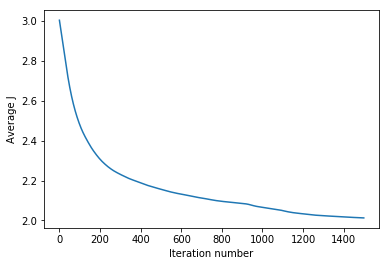

Prediction accuracy is 91.40625%


In [19]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()


# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)

Y = np.array(y_test)
m = Y.shape[0]
y1 = np.zeros((m,))


#print(y1)
#print(y_pred)


print('Prediction accuracy is {}%'.format(accuracy_score(y1, y_pred) * 100))